In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import tensorflow as tf

In [3]:
from vaneska.models import Gaussian
from vaneska.photometry import PSFPhotometry

In [4]:
from tqdm import tqdm

In [5]:
from lightkurve import KeplerTargetPixelFile, LightCurve

In [6]:
tpf = KeplerTargetPixelFile('./data/2568982-targ.fits')

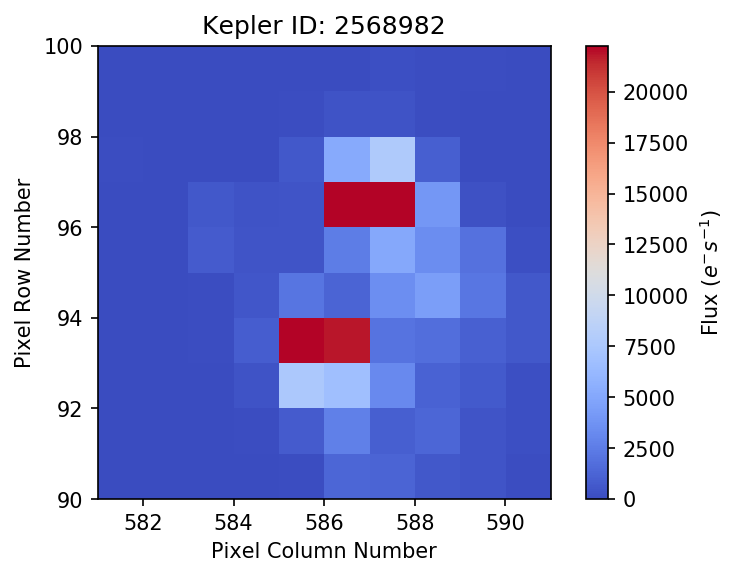

In [7]:
tpf.plot(cmap='coolwarm')

In [25]:
gaussian = Gaussian(shape=tpf.shape[1:], col_ref=581, row_ref=90)

In [26]:
xc, yc = tpf.centroids()

In [27]:
flux1 = tf.Variable(initial_value=5e4, dtype=tf.float64)
flux2 = tf.Variable(initial_value=4e4, dtype=tf.float64)

col1 = tf.Variable(initial_value=585., dtype=tf.float64)
col2 = tf.Variable(initial_value=587., dtype=tf.float64)

row1 = tf.Variable(initial_value=93., dtype=tf.float64)
dy = tf.Variable(initial_value=3., dtype=tf.float64)
row2 = tf.Variable(initial_value=96., dtype=tf.float64)

a = tf.Variable(initial_value=1., dtype=tf.float64)
b = tf.Variable(initial_value=0., dtype=tf.float64)
c = tf.Variable(initial_value=1., dtype=tf.float64)

bkg = tf.Variable(initial_value=np.nanmedian(tpf.flux[0]), dtype=tf.float64)

In [28]:
mean = gaussian(flux1, col1, row1, a, b, c) + gaussian(flux2, col2, row2, a, b, c) + bkg

In [29]:
data = tf.placeholder(dtype=tf.float64, shape=tpf.flux[0].shape)

In [30]:
loss = tf.reduce_sum(tf.squared_difference(mean, data))

In [31]:
var_list = [flux1, flux2, col1, col2, row1, row2, a, b, c, bkg]

In [32]:
grad = tf.gradients(loss, var_list)

In [36]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(loss=loss, var_list=var_list, method='TNC')

In [37]:
psf_flux1 = []
psf_flux2 = []

In [38]:
with tf.Session() as session:
    session.run(fetches=tf.global_variables_initializer())
    phot = PSFPhotometry(optimizer=optimizer)
    results = phot.fit(pixel_flux=tpf.flux, data_placeholder=data,
                       var_list=var_list, session=session)

  0%|          | 0/1626 [00:00<?, ?it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63680501.531641
  Number of iterations: 18
  Number of functions evaluations: 95


  0%|          | 1/1626 [00:00<12:26,  2.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63698398.017074
  Number of iterations: 17
  Number of functions evaluations: 73


  0%|          | 2/1626 [00:00<08:13,  3.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63658854.816339
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63639645.556286
  Number of iterations: 8
  Number of functions evaluations: 31


  0%|          | 4/1626 [00:00<04:55,  5.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63670464.682936
  Number of iterations: 12
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63745720.989399
  Number of iterations: 11
  Number of functions evaluations: 49


  0%|          | 6/1626 [00:00<03:57,  6.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63725520.392361
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63699432.072430
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63672315.670484
  Number of iterations: 7
  Number of functions evaluations: 28


  1%|          | 9/1626 [00:01<02:59,  9.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63683115.487523
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63709103.721772
  Number of iterations: 12
  Number of functions evaluations: 59


  1%|          | 11/1626 [00:01<02:51,  9.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63713320.275491
  Number of iterations: 13
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63748795.341215
  Number of iterations: 3
  Number of functions evaluations: 11


  1%|          | 13/1626 [00:01<02:37, 10.22it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63787742.395991
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63691759.820030
  Number of iterations: 12
  Number of functions evaluations: 46


  1%|          | 15/1626 [00:01<02:35, 10.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63672659.338263
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63699868.426216
  Number of iterations: 11
  Number of functions evaluations: 55


  1%|          | 17/1626 [00:01<02:29, 10.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63705388.335359
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63728438.867252
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63697245.742677
  Number of iterations: 8
  Number of functions evaluations: 35


  1%|          | 20/1626 [00:01<02:17, 11.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63648472.697274
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63632432.396732
  Number of iterations: 18
  Number of functions evaluations: 100


  1%|▏         | 22/1626 [00:01<02:21, 11.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63673132.075120
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63647517.385216
  Number of iterations: 9
  Number of functions evaluations: 37


  1%|▏         | 24/1626 [00:02<02:19, 11.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63645143.245622
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63621881.580374
  Number of iterations: 11
  Number of functions evaluations: 43


  2%|▏         | 26/1626 [00:02<02:22, 11.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63691675.285085
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63600160.561908
  Number of iterations: 8
  Number of functions evaluations: 27


  2%|▏         | 28/1626 [00:02<02:19, 11.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63610869.520681
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63636911.432217
  Number of iterations: 3
  Number of functions evaluations: 11


  2%|▏         | 30/1626 [00:02<02:19, 11.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63625934.264241
  Number of iterations: 15
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63583130.405399
  Number of iterations: 9
  Number of functions evaluations: 39


  2%|▏         | 32/1626 [00:02<02:18, 11.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63557885.838230
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63567810.643695
  Number of iterations: 16
  Number of functions evaluations: 100


  2%|▏         | 34/1626 [00:03<02:26, 10.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63566417.995851
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63599943.549874
  Number of iterations: 10
  Number of functions evaluations: 37


  2%|▏         | 36/1626 [00:03<02:25, 10.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63527906.457067
  Number of iterations: 16
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63487308.264681
  Number of iterations: 13
  Number of functions evaluations: 57


  2%|▏         | 38/1626 [00:03<02:27, 10.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63501875.318453
  Number of iterations: 13
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63434711.182197
  Number of iterations: 9
  Number of functions evaluations: 38


  2%|▏         | 40/1626 [00:03<02:26, 10.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63430793.713206
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63419283.190360
  Number of iterations: 10
  Number of functions evaluations: 46


  3%|▎         | 42/1626 [00:03<02:25, 10.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63425370.586942
  Number of iterations: 13
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63464816.947345
  Number of iterations: 8
  Number of functions evaluations: 34


  3%|▎         | 44/1626 [00:04<02:25, 10.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63399234.536895
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63453960.407878
  Number of iterations: 8
  Number of functions evaluations: 29


  3%|▎         | 46/1626 [00:04<02:23, 11.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63387975.953161
  Number of iterations: 14
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63351965.932366
  Number of iterations: 10
  Number of functions evaluations: 41


  3%|▎         | 48/1626 [00:04<02:22, 11.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63370438.510018
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63388469.857787
  Number of iterations: 5
  Number of functions evaluations: 20


  3%|▎         | 50/1626 [00:04<02:19, 11.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63360571.104948
  Number of iterations: 12
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63338566.577273
  Number of iterations: 13
  Number of functions evaluations: 54


  3%|▎         | 52/1626 [00:04<02:18, 11.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63324380.303867
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63309791.762038
  Number of iterations: 7
  Number of functions evaluations: 29


  3%|▎         | 54/1626 [00:04<02:17, 11.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63314762.008649
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63247956.603683
  Number of iterations: 11
  Number of functions evaluations: 47


  3%|▎         | 56/1626 [00:04<02:16, 11.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63232598.625049
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63209819.516927
  Number of iterations: 15
  Number of functions evaluations: 68


  4%|▎         | 58/1626 [00:05<02:15, 11.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63245022.778820
  Number of iterations: 11
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63213834.970749
  Number of iterations: 13
  Number of functions evaluations: 52


  4%|▎         | 60/1626 [00:05<02:14, 11.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63156937.863139
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63222260.550115
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63199723.057727
  Number of iterations: 8
  Number of functions evaluations: 29


  4%|▍         | 63/1626 [00:05<02:11, 11.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63106036.009503
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63183992.220356
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63093039.471106
  Number of iterations: 14
  Number of functions evaluations: 77


  4%|▍         | 66/1626 [00:05<02:08, 12.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63126543.245945
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63104829.711113
  Number of iterations: 19
  Number of functions evaluations: 100


  4%|▍         | 68/1626 [00:05<02:09, 12.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63084680.478904
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63116714.693538
  Number of iterations: 19
  Number of functions evaluations: 100


  4%|▍         | 70/1626 [00:05<02:09, 11.99it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63060080.807372
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63090173.473971
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63022092.194953
  Number of iterations: 8
  Number of functions evaluations: 38


  4%|▍         | 73/1626 [00:05<02:06, 12.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63081981.123743
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63075389.869867
  Number of iterations: 9
  Number of functions evaluations: 34


  5%|▍         | 75/1626 [00:06<02:05, 12.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63026875.513893
  Number of iterations: 18
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63005413.089500
  Number of iterations: 11
  Number of functions evaluations: 46


  5%|▍         | 77/1626 [00:06<02:06, 12.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63032771.735825
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63019055.488564
  Number of iterations: 15
  Number of functions evaluations: 74


  5%|▍         | 79/1626 [00:06<02:05, 12.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62956175.229685
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63003665.597069
  Number of iterations: 18
  Number of functions evaluations: 100


  5%|▍         | 81/1626 [00:06<02:06, 12.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63062358.126734
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62970976.850407
  Number of iterations: 8
  Number of functions evaluations: 34


  5%|▌         | 83/1626 [00:06<02:05, 12.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62993013.068963
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62973373.838858
  Number of iterations: 7
  Number of functions evaluations: 30


  5%|▌         | 85/1626 [00:06<02:05, 12.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62975458.493804
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 62926263.064375
  Number of iterations: 20
  Number of functions evaluations: 100


  5%|▌         | 87/1626 [00:07<02:05, 12.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62973522.533743
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62962470.369468
  Number of iterations: 8
  Number of functions evaluations: 36


  5%|▌         | 89/1626 [00:07<02:04, 12.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63000743.363629
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63010415.212424
  Number of iterations: 7
  Number of functions evaluations: 27


  6%|▌         | 91/1626 [00:07<02:03, 12.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62997279.035952
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63014497.957741
  Number of iterations: 17
  Number of functions evaluations: 100


  6%|▌         | 93/1626 [00:07<02:04, 12.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62992027.089807
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62915266.617485
  Number of iterations: 20
  Number of functions evaluations: 99


  6%|▌         | 95/1626 [00:07<02:05, 12.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62988941.554250
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63012717.614005
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63018689.110402
  Number of iterations: 9
  Number of functions evaluations: 43


  6%|▌         | 98/1626 [00:07<02:03, 12.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63035733.786171
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63085908.635859
  Number of iterations: 8
  Number of functions evaluations: 38


  6%|▌         | 100/1626 [00:08<02:02, 12.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63075960.128803
  Number of iterations: 15
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63087266.881510
  Number of iterations: 20
  Number of functions evaluations: 99


  6%|▋         | 102/1626 [00:08<02:03, 12.35it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63031399.155105
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63086646.117610
  Number of iterations: 13
  Number of functions evaluations: 52


  6%|▋         | 104/1626 [00:08<02:02, 12.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63105425.516280
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63131355.843637
  Number of iterations: 11
  Number of functions evaluations: 43


  7%|▋         | 106/1626 [00:08<02:01, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63144928.214254
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63113600.297440
  Number of iterations: 8
  Number of functions evaluations: 39


  7%|▋         | 108/1626 [00:08<02:01, 12.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63233499.064719
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63284627.274147
  Number of iterations: 10
  Number of functions evaluations: 52


  7%|▋         | 110/1626 [00:08<02:00, 12.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63247356.903687
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63241128.513781
  Number of iterations: 19
  Number of functions evaluations: 90


  7%|▋         | 112/1626 [00:08<02:00, 12.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63273834.221535
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63284093.300567
  Number of iterations: 10
  Number of functions evaluations: 41


  7%|▋         | 114/1626 [00:09<01:59, 12.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63334176.327093
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: 63337346.667352
  Number of iterations: 7
  Number of functions evaluations: 35


  7%|▋         | 116/1626 [00:09<01:59, 12.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63354195.985718
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63423752.180382
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63420260.083258
  Number of iterations: 9
  Number of functions evaluations: 33


  7%|▋         | 119/1626 [00:09<01:57, 12.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63440800.839617
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63417471.778496
  Number of iterations: 11
  Number of functions evaluations: 51


  7%|▋         | 121/1626 [00:09<01:57, 12.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63504684.196384
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63433976.491777
  Number of iterations: 12
  Number of functions evaluations: 46


  8%|▊         | 123/1626 [00:09<01:56, 12.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63486512.045217
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63559502.157185
  Number of iterations: 6
  Number of functions evaluations: 26


  8%|▊         | 125/1626 [00:09<01:56, 12.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63576880.645888
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63517648.526768
  Number of iterations: 13
  Number of functions evaluations: 67


  8%|▊         | 127/1626 [00:09<01:55, 12.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63603405.320498
  Number of iterations: 16
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63557839.808191
  Number of iterations: 3
  Number of functions evaluations: 12


  8%|▊         | 129/1626 [00:09<01:55, 12.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63637030.051412
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63651703.190116
  Number of iterations: 9
  Number of functions evaluations: 41


  8%|▊         | 131/1626 [00:10<01:54, 13.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63708598.609544
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63602464.442254
  Number of iterations: 7
  Number of functions evaluations: 30


  8%|▊         | 133/1626 [00:10<01:54, 13.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63730747.315542
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63695516.193908
  Number of iterations: 7
  Number of functions evaluations: 27


  8%|▊         | 135/1626 [00:10<01:53, 13.14it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63763596.235269
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63786558.536230
  Number of iterations: 10
  Number of functions evaluations: 45


  8%|▊         | 137/1626 [00:10<01:52, 13.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63800211.500160
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63828153.096114
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63832079.041852
  Number of iterations: 8
  Number of functions evaluations: 30


  9%|▊         | 140/1626 [00:10<01:51, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63860533.285552
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63888409.285665
  Number of iterations: 9
  Number of functions evaluations: 33


  9%|▊         | 142/1626 [00:10<01:51, 13.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63850695.892545
  Number of iterations: 20
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63901509.415611
  Number of iterations: 8
  Number of functions evaluations: 36


  9%|▉         | 144/1626 [00:10<01:51, 13.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63884814.937563
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63899821.352563
  Number of iterations: 13
  Number of functions evaluations: 57


  9%|▉         | 146/1626 [00:10<01:50, 13.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63961594.337989
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63924519.139897
  Number of iterations: 12
  Number of functions evaluations: 49


  9%|▉         | 148/1626 [00:11<01:50, 13.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64030998.495036
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63962063.954801
  Number of iterations: 9
  Number of functions evaluations: 46


  9%|▉         | 150/1626 [00:11<01:50, 13.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64005918.871409
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63965438.385127
  Number of iterations: 19
  Number of functions evaluations: 100


  9%|▉         | 152/1626 [00:11<01:50, 13.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63985594.974289
  Number of iterations: 13
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64014581.486650
  Number of iterations: 15
  Number of functions evaluations: 91


  9%|▉         | 154/1626 [00:11<01:50, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63953353.637179
  Number of iterations: 11
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: 64019352.542455
  Number of iterations: 8
  Number of functions evaluations: 37


 10%|▉         | 156/1626 [00:11<01:50, 13.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64110182.667279
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64053986.936204
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64049622.588405
  Number of iterations: 9
  Number of functions evaluations: 43


 10%|▉         | 159/1626 [00:11<01:49, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63977804.078920
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64016521.934824
  Number of iterations: 16
  Number of functions evaluations: 79


 10%|▉         | 161/1626 [00:11<01:49, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64014146.041872
  Number of iterations: 14
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64004863.500278
  Number of iterations: 15
  Number of functions evaluations: 64


 10%|█         | 163/1626 [00:12<01:49, 13.38it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63923865.156007
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63997690.855070
  Number of iterations: 6
  Number of functions evaluations: 24


 10%|█         | 165/1626 [00:12<01:48, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63935731.753707
  Number of iterations: 13
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63882625.818487
  Number of iterations: 8
  Number of functions evaluations: 32


 10%|█         | 167/1626 [00:12<01:48, 13.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63875035.459203
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63953757.447507
  Number of iterations: 9
  Number of functions evaluations: 47


 10%|█         | 169/1626 [00:12<01:48, 13.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63897224.117190
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63934794.179582
  Number of iterations: 8
  Number of functions evaluations: 32


 11%|█         | 171/1626 [00:12<01:48, 13.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63885127.881790
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63865088.275692
  Number of iterations: 8
  Number of functions evaluations: 34


 11%|█         | 173/1626 [00:12<01:47, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63866716.674702
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63823255.350391
  Number of iterations: 10
  Number of functions evaluations: 44


 11%|█         | 175/1626 [00:12<01:47, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63816087.400588
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63792670.657308
  Number of iterations: 13
  Number of functions evaluations: 51


 11%|█         | 177/1626 [00:13<01:47, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63824110.324814
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63798734.107273
  Number of iterations: 10
  Number of functions evaluations: 37


 11%|█         | 179/1626 [00:13<01:47, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63745716.694560
  Number of iterations: 11
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63756693.063088
  Number of iterations: 11
  Number of functions evaluations: 56


 11%|█         | 181/1626 [00:13<01:46, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63792346.160307
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63666448.368474
  Number of iterations: 8
  Number of functions evaluations: 41


 11%|█▏        | 183/1626 [00:13<01:46, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63697143.488775
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63680837.629918
  Number of iterations: 12
  Number of functions evaluations: 55


 11%|█▏        | 185/1626 [00:13<01:46, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63695581.876577
  Number of iterations: 12
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63685851.776550
  Number of iterations: 18
  Number of functions evaluations: 100


 12%|█▏        | 187/1626 [00:13<01:46, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63675893.198818
  Number of iterations: 12
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63618544.340687
  Number of iterations: 8
  Number of functions evaluations: 36


 12%|█▏        | 189/1626 [00:13<01:46, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63591554.409564
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63671313.938701
  Number of iterations: 9
  Number of functions evaluations: 42


 12%|█▏        | 191/1626 [00:14<01:45, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63587083.425143
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63644904.117400
  Number of iterations: 11
  Number of functions evaluations: 49


 12%|█▏        | 193/1626 [00:14<01:45, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63591669.574069
  Number of iterations: 10
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63529325.619588
  Number of iterations: 19
  Number of functions evaluations: 100


 12%|█▏        | 195/1626 [00:14<01:45, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63570431.085147
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63545385.865107
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63536958.703958
  Number of iterations: 10
  Number of functions evaluations: 37


 12%|█▏        | 198/1626 [00:14<01:45, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63525206.034487
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63564665.696800
  Number of iterations: 11
  Number of functions evaluations: 46


 12%|█▏        | 200/1626 [00:14<01:45, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63437185.670675
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63494718.842600
  Number of iterations: 3
  Number of functions evaluations: 10


 12%|█▏        | 202/1626 [00:14<01:45, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63407768.764464
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63492410.410131
  Number of iterations: 19
  Number of functions evaluations: 80


 13%|█▎        | 204/1626 [00:15<01:45, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63525253.220793
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63488503.281709
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63437814.721608
  Number of iterations: 15
  Number of functions evaluations: 90


 13%|█▎        | 207/1626 [00:15<01:44, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63428551.835271
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63499952.655257
  Number of iterations: 12
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63419932.649476
  Number of iterations: 9
  Number of functions evaluations: 43


 13%|█▎        | 210/1626 [00:15<01:43, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63433903.871078
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63522365.813766
  Number of iterations: 7
  Number of functions evaluations: 30


 13%|█▎        | 212/1626 [00:15<01:43, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63433999.402589
  Number of iterations: 10
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63439198.363906
  Number of iterations: 12
  Number of functions evaluations: 45


 13%|█▎        | 214/1626 [00:15<01:43, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63473120.103164
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63493387.742288
  Number of iterations: 18
  Number of functions evaluations: 99


 13%|█▎        | 216/1626 [00:15<01:43, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63447940.973124
  Number of iterations: 10
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63465759.781383
  Number of iterations: 8
  Number of functions evaluations: 34


 13%|█▎        | 218/1626 [00:15<01:43, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63498323.961207
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63412918.879649
  Number of iterations: 8
  Number of functions evaluations: 36


 14%|█▎        | 220/1626 [00:16<01:42, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63438397.367962
  Number of iterations: 16
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63426508.566415
  Number of iterations: 11
  Number of functions evaluations: 40


 14%|█▎        | 222/1626 [00:16<01:42, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63401878.053101
  Number of iterations: 11
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63427941.311321
  Number of iterations: 11
  Number of functions evaluations: 40


 14%|█▍        | 224/1626 [00:16<01:42, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63412491.181280
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63469463.978535
  Number of iterations: 12
  Number of functions evaluations: 53


 14%|█▍        | 226/1626 [00:16<01:42, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63474326.267603
  Number of iterations: 13
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63527716.688658
  Number of iterations: 10
  Number of functions evaluations: 40


 14%|█▍        | 228/1626 [00:16<01:42, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63571255.855619
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63528839.166361
  Number of iterations: 19
  Number of functions evaluations: 100


 14%|█▍        | 230/1626 [00:16<01:42, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63537503.491459
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63506577.018130
  Number of iterations: 14
  Number of functions evaluations: 69


 14%|█▍        | 232/1626 [00:16<01:42, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63513337.805603
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63565934.349930
  Number of iterations: 9
  Number of functions evaluations: 37


 14%|█▍        | 234/1626 [00:17<01:41, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63573440.038978
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63559909.971707
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63510734.683661
  Number of iterations: 11
  Number of functions evaluations: 48


 15%|█▍        | 237/1626 [00:17<01:41, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63574142.887448
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63497029.158039
  Number of iterations: 10
  Number of functions evaluations: 42


 15%|█▍        | 239/1626 [00:17<01:41, 13.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63611891.975653
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63620988.568522
  Number of iterations: 10
  Number of functions evaluations: 42


 15%|█▍        | 241/1626 [00:17<01:40, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63556242.104248
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63578268.578040
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63555084.640332
  Number of iterations: 10
  Number of functions evaluations: 38


 15%|█▌        | 244/1626 [00:17<01:40, 13.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63532892.894105
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63592468.366067
  Number of iterations: 12
  Number of functions evaluations: 49


 15%|█▌        | 246/1626 [00:17<01:39, 13.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63583390.258297
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63566274.853056
  Number of iterations: 12
  Number of functions evaluations: 57


 15%|█▌        | 248/1626 [00:17<01:39, 13.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63608281.471707
  Number of iterations: 15
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63565512.644568
  Number of iterations: 12
  Number of functions evaluations: 60


 15%|█▌        | 250/1626 [00:18<01:39, 13.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63585964.217970
  Number of iterations: 14
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63534888.066356
  Number of iterations: 17
  Number of functions evaluations: 100


 15%|█▌        | 252/1626 [00:18<01:40, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63574919.630783
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63586336.426004
  Number of iterations: 10
  Number of functions evaluations: 45


 16%|█▌        | 254/1626 [00:18<01:39, 13.74it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63640365.067176
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63621687.439399
  Number of iterations: 10
  Number of functions evaluations: 38


 16%|█▌        | 256/1626 [00:18<01:39, 13.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63567054.970497
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63598317.677199
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63585213.662305
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63544693.326710
  Number of iterations: 12
  Number of functions evaluations: 49


 16%|█▌        | 260/1626 [00:18<01:38, 13.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63555256.150516
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63540123.315249
  Number of iterations: 3
  Number of functions evaluations: 11


 16%|█▌        | 262/1626 [00:18<01:38, 13.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63580509.113391
  Number of iterations: 9
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63546445.109002
  Number of iterations: 8
  Number of functions evaluations: 31


 16%|█▌        | 264/1626 [00:19<01:38, 13.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63591959.269043
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63508530.564490
  Number of iterations: 17
  Number of functions evaluations: 85


 16%|█▋        | 266/1626 [00:19<01:38, 13.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63573237.411566
  Number of iterations: 13
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63570216.249698
  Number of iterations: 14
  Number of functions evaluations: 54


 16%|█▋        | 268/1626 [00:19<01:38, 13.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63553628.592414
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63553581.923897
  Number of iterations: 8
  Number of functions evaluations: 36


 17%|█▋        | 270/1626 [00:19<01:38, 13.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63510689.803683
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63454640.220409
  Number of iterations: 7
  Number of functions evaluations: 31


 17%|█▋        | 272/1626 [00:19<01:38, 13.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63540083.177617
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63529235.021871
  Number of iterations: 9
  Number of functions evaluations: 35


 17%|█▋        | 274/1626 [00:19<01:38, 13.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63521998.731625
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63418598.076861
  Number of iterations: 16
  Number of functions evaluations: 75


 17%|█▋        | 276/1626 [00:20<01:38, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63591857.463922
  Number of iterations: 11
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63497477.062084
  Number of iterations: 11
  Number of functions evaluations: 44


 17%|█▋        | 278/1626 [00:20<01:38, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63485117.647939
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63407939.201493
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63453059.797662
  Number of iterations: 10
  Number of functions evaluations: 53


 17%|█▋        | 281/1626 [00:20<01:38, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63420962.679297
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63411766.375191
  Number of iterations: 10
  Number of functions evaluations: 42


 17%|█▋        | 283/1626 [00:20<01:37, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63377554.870929
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63461124.649859
  Number of iterations: 14
  Number of functions evaluations: 86


 18%|█▊        | 285/1626 [00:20<01:38, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63383063.984814
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63292039.908583
  Number of iterations: 10
  Number of functions evaluations: 48


 18%|█▊        | 287/1626 [00:21<01:38, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63343224.619650
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63384566.349753
  Number of iterations: 12
  Number of functions evaluations: 57


 18%|█▊        | 289/1626 [00:21<01:37, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63253652.680708
  Number of iterations: 11
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63231878.186999
  Number of iterations: 8
  Number of functions evaluations: 28


 18%|█▊        | 291/1626 [00:21<01:37, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63265443.403706
  Number of iterations: 14
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63294491.395751
  Number of iterations: 9
  Number of functions evaluations: 36


 18%|█▊        | 293/1626 [00:21<01:37, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63211931.477144
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63271986.948916
  Number of iterations: 10
  Number of functions evaluations: 47


 18%|█▊        | 295/1626 [00:21<01:37, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63244498.257254
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63213277.436330
  Number of iterations: 10
  Number of functions evaluations: 46


 18%|█▊        | 297/1626 [00:21<01:37, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63214708.277511
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63201021.283008
  Number of iterations: 9
  Number of functions evaluations: 40


 18%|█▊        | 299/1626 [00:21<01:37, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63176719.894747
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63153567.461588
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63165896.506955
  Number of iterations: 4
  Number of functions evaluations: 13


 19%|█▊        | 302/1626 [00:22<01:36, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63108423.583100
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63163703.456901
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63133408.950234
  Number of iterations: 18
  Number of functions evaluations: 87


 19%|█▉        | 305/1626 [00:22<01:36, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63127130.495217
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63103956.254807
  Number of iterations: 17
  Number of functions evaluations: 98


 19%|█▉        | 307/1626 [00:22<01:36, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63077897.328478
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63044368.963605
  Number of iterations: 12
  Number of functions evaluations: 70


 19%|█▉        | 309/1626 [00:22<01:36, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63118267.828207
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63037792.191647
  Number of iterations: 9
  Number of functions evaluations: 42


 19%|█▉        | 311/1626 [00:22<01:36, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63080635.056513
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63041773.084727
  Number of iterations: 19
  Number of functions evaluations: 77


 19%|█▉        | 313/1626 [00:22<01:36, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63015986.216905
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63040618.810660
  Number of iterations: 9
  Number of functions evaluations: 41


 19%|█▉        | 315/1626 [00:23<01:36, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63042741.972330
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63003712.839995
  Number of iterations: 8
  Number of functions evaluations: 34


 19%|█▉        | 317/1626 [00:23<01:35, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62990939.333546
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62985742.197157
  Number of iterations: 11
  Number of functions evaluations: 46


 20%|█▉        | 319/1626 [00:23<01:35, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62982699.594139
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63041776.664945
  Number of iterations: 15
  Number of functions evaluations: 88


 20%|█▉        | 321/1626 [00:23<01:35, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62983547.457602
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62956415.733447
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62887377.167126
  Number of iterations: 12
  Number of functions evaluations: 67


 20%|█▉        | 324/1626 [00:23<01:34, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62908462.905915
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62939401.464764
  Number of iterations: 13
  Number of functions evaluations: 70


 20%|██        | 326/1626 [00:23<01:34, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62933456.683422
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62945542.896353
  Number of iterations: 8
  Number of functions evaluations: 36


 20%|██        | 328/1626 [00:23<01:34, 13.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62901929.367280
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62852113.437313
  Number of iterations: 3
  Number of functions evaluations: 12


 20%|██        | 330/1626 [00:24<01:34, 13.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62940373.641220
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62894265.085838
  Number of iterations: 7
  Number of functions evaluations: 25


 20%|██        | 332/1626 [00:24<01:34, 13.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62868347.681866
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62859188.818121
  Number of iterations: 16
  Number of functions evaluations: 71


 21%|██        | 334/1626 [00:24<01:34, 13.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62832959.727058
  Number of iterations: 18
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62906124.284042
  Number of iterations: 8
  Number of functions evaluations: 40


 21%|██        | 336/1626 [00:24<01:34, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62891856.856735
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62901124.222325
  Number of iterations: 7
  Number of functions evaluations: 28


 21%|██        | 338/1626 [00:24<01:34, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62928482.042150
  Number of iterations: 14
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62931728.724409
  Number of iterations: 18
  Number of functions evaluations: 96


 21%|██        | 340/1626 [00:24<01:34, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62944363.515280
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62966793.211442
  Number of iterations: 10
  Number of functions evaluations: 39


 21%|██        | 342/1626 [00:25<01:34, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62972922.838312
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63027227.426467
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62983732.372661
  Number of iterations: 7
  Number of functions evaluations: 28


 21%|██        | 345/1626 [00:25<01:33, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63069725.727310
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62963922.664526
  Number of iterations: 5
  Number of functions evaluations: 18


 21%|██▏       | 347/1626 [00:25<01:33, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 62982170.311160
  Number of iterations: 16
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63050677.019732
  Number of iterations: 10
  Number of functions evaluations: 37


 21%|██▏       | 349/1626 [00:25<01:33, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63068418.891695
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63077724.383732
  Number of iterations: 13
  Number of functions evaluations: 54


 22%|██▏       | 351/1626 [00:25<01:33, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63114035.352304
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63147421.948690
  Number of iterations: 9
  Number of functions evaluations: 32


 22%|██▏       | 353/1626 [00:25<01:33, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63099201.478418
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63199734.216662
  Number of iterations: 13
  Number of functions evaluations: 87


 22%|██▏       | 355/1626 [00:26<01:33, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63212918.293381
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63210340.740991
  Number of iterations: 16
  Number of functions evaluations: 100


 22%|██▏       | 357/1626 [00:26<01:33, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63198986.579036
  Number of iterations: 12
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63236570.036006
  Number of iterations: 16
  Number of functions evaluations: 100


 22%|██▏       | 359/1626 [00:26<01:33, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63246633.722061
  Number of iterations: 4
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63291956.938983
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63306437.331373
  Number of iterations: 9
  Number of functions evaluations: 42


 22%|██▏       | 362/1626 [00:26<01:33, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63330640.465682
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63361762.131328
  Number of iterations: 7
  Number of functions evaluations: 30


 22%|██▏       | 364/1626 [00:26<01:32, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63420064.593023
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63421901.100466
  Number of iterations: 9
  Number of functions evaluations: 35


 23%|██▎       | 366/1626 [00:26<01:32, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63397078.743572
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63453702.427380
  Number of iterations: 9
  Number of functions evaluations: 40


 23%|██▎       | 368/1626 [00:27<01:32, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63441802.791036
  Number of iterations: 12
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63567312.596165
  Number of iterations: 7
  Number of functions evaluations: 29


 23%|██▎       | 370/1626 [00:27<01:32, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63543591.675883
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63545021.720238
  Number of iterations: 5
  Number of functions evaluations: 21


 23%|██▎       | 372/1626 [00:27<01:31, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63506476.183292
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63610468.185255
  Number of iterations: 7
  Number of functions evaluations: 29


 23%|██▎       | 374/1626 [00:27<01:31, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63639959.349606
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63715959.065475
  Number of iterations: 16
  Number of functions evaluations: 87


 23%|██▎       | 376/1626 [00:27<01:31, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63610178.533965
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63728814.938557
  Number of iterations: 6
  Number of functions evaluations: 21


 23%|██▎       | 378/1626 [00:27<01:31, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63759734.396760
  Number of iterations: 19
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63764690.880988
  Number of iterations: 11
  Number of functions evaluations: 55


 23%|██▎       | 380/1626 [00:27<01:31, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63812720.009778
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63819611.943652
  Number of iterations: 10
  Number of functions evaluations: 52


 23%|██▎       | 382/1626 [00:28<01:31, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63856840.915751
  Number of iterations: 11
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63913072.266055
  Number of iterations: 4
  Number of functions evaluations: 15


 24%|██▎       | 384/1626 [00:28<01:31, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63861019.418142
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63870083.670043
  Number of iterations: 9
  Number of functions evaluations: 37


 24%|██▎       | 386/1626 [00:28<01:30, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63917110.314820
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63952781.281759
  Number of iterations: 9
  Number of functions evaluations: 47


 24%|██▍       | 388/1626 [00:28<01:30, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63948335.455851
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63999083.911920
  Number of iterations: 8
  Number of functions evaluations: 31


 24%|██▍       | 390/1626 [00:28<01:30, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63995577.371543
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64066390.838146
  Number of iterations: 11
  Number of functions evaluations: 45


 24%|██▍       | 392/1626 [00:28<01:30, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64050779.774926
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64093964.086019
  Number of iterations: 13
  Number of functions evaluations: 49


 24%|██▍       | 394/1626 [00:28<01:29, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64046509.982987
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64107252.518052
  Number of iterations: 9
  Number of functions evaluations: 43


 24%|██▍       | 396/1626 [00:28<01:29, 13.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64136151.675443
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64128031.329547
  Number of iterations: 10
  Number of functions evaluations: 44


 24%|██▍       | 398/1626 [00:29<01:29, 13.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64159416.609585
  Number of iterations: 11
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64236812.273404
  Number of iterations: 7
  Number of functions evaluations: 35


 25%|██▍       | 400/1626 [00:29<01:29, 13.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64174380.970131
  Number of iterations: 17
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64209750.497919
  Number of iterations: 20
  Number of functions evaluations: 100


 25%|██▍       | 402/1626 [00:29<01:29, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64174156.828635
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64173060.492810
  Number of iterations: 14
  Number of functions evaluations: 81


 25%|██▍       | 404/1626 [00:29<01:29, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64199731.974005
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64207770.385258
  Number of iterations: 10
  Number of functions evaluations: 39


 25%|██▍       | 406/1626 [00:29<01:29, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64135612.715309
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64170266.999799
  Number of iterations: 8
  Number of functions evaluations: 32


 25%|██▌       | 408/1626 [00:29<01:29, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64113723.959817
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64192470.914954
  Number of iterations: 17
  Number of functions evaluations: 67


 25%|██▌       | 410/1626 [00:30<01:29, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64057155.757879
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64151516.538638
  Number of iterations: 9
  Number of functions evaluations: 37


 25%|██▌       | 412/1626 [00:30<01:28, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64162407.312903
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64098729.422899
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64085785.207555
  Number of iterations: 6
  Number of functions evaluations: 28


 26%|██▌       | 415/1626 [00:30<01:28, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64076566.697748
  Number of iterations: 4
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64155330.154142
  Number of iterations: 16
  Number of functions evaluations: 100


 26%|██▌       | 417/1626 [00:30<01:28, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64068361.246901
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64063550.496733
  Number of iterations: 15
  Number of functions evaluations: 87


 26%|██▌       | 419/1626 [00:30<01:28, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64006282.048917
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64056994.860922
  Number of iterations: 7
  Number of functions evaluations: 27


 26%|██▌       | 421/1626 [00:30<01:28, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64064909.512849
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64103761.666752
  Number of iterations: 10
  Number of functions evaluations: 42


 26%|██▌       | 423/1626 [00:30<01:28, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64043122.890859
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64022683.230908
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64013589.001313
  Number of iterations: 18
  Number of functions evaluations: 100


 26%|██▌       | 426/1626 [00:31<01:27, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64023707.437539
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63994101.856239
  Number of iterations: 18
  Number of functions evaluations: 76


 26%|██▋       | 428/1626 [00:31<01:27, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63940253.994282
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63975533.028508
  Number of iterations: 11
  Number of functions evaluations: 51


 26%|██▋       | 430/1626 [00:31<01:27, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63960963.117772
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63934475.416700
  Number of iterations: 15
  Number of functions evaluations: 83


 27%|██▋       | 432/1626 [00:31<01:27, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63876622.598762
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63878813.084117
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63888328.841707
  Number of iterations: 8
  Number of functions evaluations: 36


 27%|██▋       | 435/1626 [00:31<01:27, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63840002.358822
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63814813.315733
  Number of iterations: 11
  Number of functions evaluations: 43


 27%|██▋       | 437/1626 [00:32<01:27, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63814121.822007
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63833685.313386
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63740737.887994
  Number of iterations: 6
  Number of functions evaluations: 24


 27%|██▋       | 440/1626 [00:32<01:26, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63774761.388373
  Number of iterations: 12
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63786007.899786
  Number of iterations: 9
  Number of functions evaluations: 46


 27%|██▋       | 442/1626 [00:32<01:26, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63810130.587217
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63859672.800752
  Number of iterations: 8
  Number of functions evaluations: 33


 27%|██▋       | 444/1626 [00:32<01:26, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63763613.892999
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63705375.685426
  Number of iterations: 8
  Number of functions evaluations: 37


 27%|██▋       | 446/1626 [00:32<01:26, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63787570.362935
  Number of iterations: 10
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63779982.902002
  Number of iterations: 8
  Number of functions evaluations: 35


 28%|██▊       | 448/1626 [00:32<01:26, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63706690.893428
  Number of iterations: 12
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63743528.554799
  Number of iterations: 9
  Number of functions evaluations: 40


 28%|██▊       | 450/1626 [00:33<01:26, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63745365.942145
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63734049.746457
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63781604.031120
  Number of iterations: 14
  Number of functions evaluations: 66


 28%|██▊       | 453/1626 [00:33<01:26, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63732809.818659
  Number of iterations: 11
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63729439.309421
  Number of iterations: 13
  Number of functions evaluations: 53


 28%|██▊       | 455/1626 [00:33<01:26, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63742390.913504
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63725794.791451
  Number of iterations: 8
  Number of functions evaluations: 34


 28%|██▊       | 457/1626 [00:33<01:25, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63727403.400048
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63671353.693848
  Number of iterations: 15
  Number of functions evaluations: 64


 28%|██▊       | 459/1626 [00:33<01:25, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63797898.604523
  Number of iterations: 18
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63799324.959984
  Number of iterations: 7
  Number of functions evaluations: 34


 28%|██▊       | 461/1626 [00:33<01:25, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63702892.708680
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63672742.674155
  Number of iterations: 6
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63768357.366934
  Number of iterations: 11
  Number of functions evaluations: 45


 29%|██▊       | 464/1626 [00:34<01:25, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63737603.255900
  Number of iterations: 13
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63687641.142538
  Number of iterations: 14
  Number of functions evaluations: 62


 29%|██▊       | 466/1626 [00:34<01:25, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63763505.445949
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63712833.584456
  Number of iterations: 15
  Number of functions evaluations: 79


 29%|██▉       | 468/1626 [00:34<01:25, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63774118.702090
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63724502.740929
  Number of iterations: 4
  Number of functions evaluations: 16


 29%|██▉       | 470/1626 [00:34<01:25, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63794205.335527
  Number of iterations: 9
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63713877.255234
  Number of iterations: 13
  Number of functions evaluations: 71


 29%|██▉       | 472/1626 [00:34<01:25, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63715804.146541
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63785223.463821
  Number of iterations: 7
  Number of functions evaluations: 29


 29%|██▉       | 474/1626 [00:35<01:25, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63821219.438264
  Number of iterations: 13
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63858551.209615
  Number of iterations: 10
  Number of functions evaluations: 50


 29%|██▉       | 476/1626 [00:35<01:25, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63817394.316022
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63866227.629595
  Number of iterations: 18
  Number of functions evaluations: 98


 29%|██▉       | 478/1626 [00:35<01:25, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63898586.442869
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63822476.446853
  Number of iterations: 9
  Number of functions evaluations: 32


 30%|██▉       | 480/1626 [00:35<01:24, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63851251.502835
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63910597.678524
  Number of iterations: 13
  Number of functions evaluations: 72


 30%|██▉       | 482/1626 [00:35<01:24, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63891441.712545
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63796605.711562
  Number of iterations: 15
  Number of functions evaluations: 70


 30%|██▉       | 484/1626 [00:35<01:24, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63913242.039905
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63922161.050515
  Number of iterations: 7
  Number of functions evaluations: 26


 30%|██▉       | 486/1626 [00:36<01:24, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63902565.582398
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63864460.076528
  Number of iterations: 13
  Number of functions evaluations: 50


 30%|███       | 488/1626 [00:36<01:24, 13.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63869248.681271
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63864385.855136
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63924188.285473
  Number of iterations: 7
  Number of functions evaluations: 27


 30%|███       | 491/1626 [00:36<01:24, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63852592.684630
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63837235.906863
  Number of iterations: 11
  Number of functions evaluations: 57


 30%|███       | 493/1626 [00:36<01:23, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63904785.206034
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63824255.826947
  Number of iterations: 15
  Number of functions evaluations: 100


 30%|███       | 495/1626 [00:36<01:23, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63861229.373369
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63856930.602506
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63925773.381795
  Number of iterations: 10
  Number of functions evaluations: 46


 31%|███       | 498/1626 [00:36<01:23, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63879517.504308
  Number of iterations: 13
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63873697.317290
  Number of iterations: 18
  Number of functions evaluations: 81


 31%|███       | 500/1626 [00:37<01:23, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63961601.546153
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63882666.309073
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63976043.250676
  Number of iterations: 12
  Number of functions evaluations: 71


 31%|███       | 503/1626 [00:37<01:23, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63953226.429701
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64056542.599930
  Number of iterations: 11
  Number of functions evaluations: 50


 31%|███       | 505/1626 [00:37<01:22, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63932957.763597
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63899502.707973
  Number of iterations: 17
  Number of functions evaluations: 100


 31%|███       | 507/1626 [00:37<01:22, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63925566.982913
  Number of iterations: 14
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63918137.109182
  Number of iterations: 11
  Number of functions evaluations: 43


 31%|███▏      | 509/1626 [00:37<01:22, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63850579.698563
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63920497.476425
  Number of iterations: 8
  Number of functions evaluations: 29


 31%|███▏      | 511/1626 [00:37<01:22, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63917022.127123
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63943054.557856
  Number of iterations: 12
  Number of functions evaluations: 41


 32%|███▏      | 513/1626 [00:37<01:22, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63906021.989530
  Number of iterations: 14
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63939812.157602
  Number of iterations: 10
  Number of functions evaluations: 41


 32%|███▏      | 515/1626 [00:38<01:22, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63965720.525284
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63916688.336483
  Number of iterations: 8
  Number of functions evaluations: 38


 32%|███▏      | 517/1626 [00:38<01:21, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63883113.819698
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63881737.223239
  Number of iterations: 11
  Number of functions evaluations: 41


 32%|███▏      | 519/1626 [00:38<01:21, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63899138.660776
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63955199.011004
  Number of iterations: 9
  Number of functions evaluations: 44


 32%|███▏      | 521/1626 [00:38<01:21, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63837566.936757
  Number of iterations: 11
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63922686.763439
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63879637.097184
  Number of iterations: 19
  Number of functions evaluations: 100


 32%|███▏      | 524/1626 [00:38<01:21, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63836090.809711
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63884537.900801
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63883159.191085
  Number of iterations: 18
  Number of functions evaluations: 100


 32%|███▏      | 527/1626 [00:38<01:21, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63867728.732670
  Number of iterations: 12
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63773543.010226
  Number of iterations: 7
  Number of functions evaluations: 31


 33%|███▎      | 529/1626 [00:39<01:20, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63832486.629108
  Number of iterations: 8
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63806315.041335
  Number of iterations: 7
  Number of functions evaluations: 27


 33%|███▎      | 531/1626 [00:39<01:20, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63764544.429472
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63821732.063404
  Number of iterations: 9
  Number of functions evaluations: 39


 33%|███▎      | 533/1626 [00:39<01:20, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63822567.012595
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63807629.917884
  Number of iterations: 14
  Number of functions evaluations: 70


 33%|███▎      | 535/1626 [00:39<01:20, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63721085.211123
  Number of iterations: 14
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63781463.825083
  Number of iterations: 15
  Number of functions evaluations: 64


 33%|███▎      | 537/1626 [00:39<01:20, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63741841.083810
  Number of iterations: 6
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63748849.978647
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63724458.983813
  Number of iterations: 9
  Number of functions evaluations: 39


 33%|███▎      | 540/1626 [00:39<01:19, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63703093.153902
  Number of iterations: 12
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63771974.201439
  Number of iterations: 3
  Number of functions evaluations: 11


 33%|███▎      | 542/1626 [00:39<01:19, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63723682.281545
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63743756.638790
  Number of iterations: 15
  Number of functions evaluations: 73


 33%|███▎      | 544/1626 [00:40<01:19, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63646072.703665
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63650893.643944
  Number of iterations: 17
  Number of functions evaluations: 100


 34%|███▎      | 546/1626 [00:40<01:19, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63665691.459936
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63703734.871387
  Number of iterations: 14
  Number of functions evaluations: 54


 34%|███▎      | 548/1626 [00:40<01:19, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63681795.959624
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63662575.984329
  Number of iterations: 10
  Number of functions evaluations: 48


 34%|███▍      | 550/1626 [00:40<01:19, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63586826.386096
  Number of iterations: 4
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63638946.288498
  Number of iterations: 7
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63667015.970536
  Number of iterations: 6
  Number of functions evaluations: 25


 34%|███▍      | 553/1626 [00:40<01:18, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63635245.475821
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63583063.814913
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63568817.422088
  Number of iterations: 12
  Number of functions evaluations: 65


 34%|███▍      | 556/1626 [00:40<01:18, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63630902.065224
  Number of iterations: 14
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63651431.368798
  Number of iterations: 10
  Number of functions evaluations: 51


 34%|███▍      | 558/1626 [00:40<01:18, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63621245.256479
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63590409.576124
  Number of iterations: 7
  Number of functions evaluations: 31


 34%|███▍      | 560/1626 [00:41<01:18, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63663882.235232
  Number of iterations: 7
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63580594.855995
  Number of iterations: 13
  Number of functions evaluations: 52


 35%|███▍      | 562/1626 [00:41<01:18, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63595645.142502
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63593490.152429
  Number of iterations: 10
  Number of functions evaluations: 46


 35%|███▍      | 564/1626 [00:41<01:18, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63589746.400919
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63582159.930864
  Number of iterations: 6
  Number of functions evaluations: 23


 35%|███▍      | 566/1626 [00:41<01:17, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63559931.523379
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63616760.066267
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63486259.814123
  Number of iterations: 8
  Number of functions evaluations: 34


 35%|███▍      | 569/1626 [00:41<01:17, 13.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63560950.540809
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63524079.461135
  Number of iterations: 10
  Number of functions evaluations: 34


 35%|███▌      | 571/1626 [00:41<01:17, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63495474.293490
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63412455.529048
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63470352.406084
  Number of iterations: 19
  Number of functions evaluations: 100


 35%|███▌      | 574/1626 [00:42<01:17, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63451723.128414
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63445428.004201
  Number of iterations: 13
  Number of functions evaluations: 65


 35%|███▌      | 576/1626 [00:42<01:16, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63425739.917538
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63510235.358794
  Number of iterations: 7
  Number of functions evaluations: 36


 36%|███▌      | 578/1626 [00:42<01:16, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63463049.752308
  Number of iterations: 11
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63469017.276928
  Number of iterations: 6
  Number of functions evaluations: 26


 36%|███▌      | 580/1626 [00:42<01:16, 13.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63495511.978607
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63476138.718758
  Number of iterations: 14
  Number of functions evaluations: 67


 36%|███▌      | 582/1626 [00:42<01:16, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63524834.065196
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63539271.630457
  Number of iterations: 8
  Number of functions evaluations: 38


 36%|███▌      | 584/1626 [00:42<01:16, 13.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63538459.818541
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63572955.049781
  Number of iterations: 11
  Number of functions evaluations: 40


 36%|███▌      | 586/1626 [00:42<01:15, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63560436.495403
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63524527.757928
  Number of iterations: 14
  Number of functions evaluations: 69


 36%|███▌      | 588/1626 [00:42<01:15, 13.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63510376.333372
  Number of iterations: 24
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63523659.582221
  Number of iterations: 15
  Number of functions evaluations: 67


 36%|███▋      | 590/1626 [00:43<01:15, 13.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 63537462.512854
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63584952.826352
  Number of iterations: 11
  Number of functions evaluations: 48


 36%|███▋      | 592/1626 [00:43<01:15, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63573716.585711
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63625336.565468
  Number of iterations: 15
  Number of functions evaluations: 82


 37%|███▋      | 594/1626 [00:43<01:15, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63639260.639972
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63597481.244842
  Number of iterations: 18
  Number of functions evaluations: 100


 37%|███▋      | 596/1626 [00:43<01:15, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63676779.713220
  Number of iterations: 12
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63728288.920423
  Number of iterations: 11
  Number of functions evaluations: 45


 37%|███▋      | 598/1626 [00:43<01:15, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63727181.348280
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63749837.655380
  Number of iterations: 10
  Number of functions evaluations: 49


 37%|███▋      | 600/1626 [00:44<01:15, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63811956.746639
  Number of iterations: 17
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63833470.153887
  Number of iterations: 11
  Number of functions evaluations: 52


 37%|███▋      | 602/1626 [00:44<01:15, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63841706.381415
  Number of iterations: 17
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63798405.269086
  Number of iterations: 15
  Number of functions evaluations: 77


 37%|███▋      | 604/1626 [00:44<01:15, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63811300.020686
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63930047.600744
  Number of iterations: 13
  Number of functions evaluations: 49


 37%|███▋      | 606/1626 [00:44<01:15, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63961193.759423
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 63973892.469904
  Number of iterations: 11
  Number of functions evaluations: 46


 37%|███▋      | 608/1626 [00:44<01:14, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64003364.748532
  Number of iterations: 15
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64055456.184386
  Number of iterations: 10
  Number of functions evaluations: 42


 38%|███▊      | 610/1626 [00:44<01:14, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64087026.402314
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64044286.502078
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64035103.543839
  Number of iterations: 9
  Number of functions evaluations: 40


 38%|███▊      | 613/1626 [00:45<01:14, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64104927.556696
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64149811.680001
  Number of iterations: 13
  Number of functions evaluations: 72


 38%|███▊      | 615/1626 [00:45<01:14, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64160325.519392
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64180565.803338
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64155486.526932
  Number of iterations: 12
  Number of functions evaluations: 60


 38%|███▊      | 618/1626 [00:45<01:13, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64246735.414744
  Number of iterations: 11
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64284136.192162
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64327515.953556
  Number of iterations: 16
  Number of functions evaluations: 79


 38%|███▊      | 621/1626 [00:45<01:13, 13.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64314564.558564
  Number of iterations: 16
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64335641.615708
  Number of iterations: 16
  Number of functions evaluations: 100


 38%|███▊      | 623/1626 [00:45<01:13, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64374077.119618
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64476664.177812
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64436454.565645
  Number of iterations: 10
  Number of functions evaluations: 43


 38%|███▊      | 626/1626 [00:45<01:13, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64446298.835747
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64467263.135183
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64559482.514937
  Number of iterations: 18
  Number of functions evaluations: 87


 39%|███▊      | 629/1626 [00:46<01:13, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64564545.670490
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64634676.703860
  Number of iterations: 14
  Number of functions evaluations: 67


 39%|███▉      | 631/1626 [00:46<01:13, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64570898.417588
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64597864.286387
  Number of iterations: 17
  Number of functions evaluations: 79


 39%|███▉      | 633/1626 [00:46<01:13, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64703439.770232
  Number of iterations: 9
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64682717.526115
  Number of iterations: 12
  Number of functions evaluations: 53


 39%|███▉      | 635/1626 [00:46<01:12, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64692684.491709
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64699099.906406
  Number of iterations: 11
  Number of functions evaluations: 68


 39%|███▉      | 637/1626 [00:46<01:12, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64761816.634522
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64814967.262223
  Number of iterations: 8
  Number of functions evaluations: 39


 39%|███▉      | 639/1626 [00:46<01:12, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64858688.069075
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64751481.011383
  Number of iterations: 10
  Number of functions evaluations: 45


 39%|███▉      | 641/1626 [00:47<01:12, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64790952.343378
  Number of iterations: 17
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64855608.654775
  Number of iterations: 16
  Number of functions evaluations: 100


 40%|███▉      | 643/1626 [00:47<01:12, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64848625.691979
  Number of iterations: 15
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64884983.557151
  Number of iterations: 16
  Number of functions evaluations: 91


 40%|███▉      | 645/1626 [00:47<01:12, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64885440.754526
  Number of iterations: 13
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64888361.973210
  Number of iterations: 9
  Number of functions evaluations: 47


 40%|███▉      | 647/1626 [00:47<01:12, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64965518.812506
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64933095.974676
  Number of iterations: 4
  Number of functions evaluations: 16


 40%|███▉      | 649/1626 [00:47<01:12, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64989512.602596
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64944984.196012
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64899123.499270
  Number of iterations: 14
  Number of functions evaluations: 58


 40%|████      | 652/1626 [00:48<01:11, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64889244.400498
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64904513.633997
  Number of iterations: 12
  Number of functions evaluations: 57


 40%|████      | 654/1626 [00:48<01:11, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64839000.241073
  Number of iterations: 15
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64836942.541290
  Number of iterations: 3
  Number of functions evaluations: 11


 40%|████      | 656/1626 [00:48<01:11, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64840585.375027
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64909848.122523
  Number of iterations: 10
  Number of functions evaluations: 48


 40%|████      | 658/1626 [00:48<01:11, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64887091.919783
  Number of iterations: 10
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64859102.638559
  Number of iterations: 11
  Number of functions evaluations: 57


 41%|████      | 660/1626 [00:48<01:11, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64942307.239948
  Number of iterations: 11
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64841009.127412
  Number of iterations: 16
  Number of functions evaluations: 78


 41%|████      | 662/1626 [00:48<01:11, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64859822.403919
  Number of iterations: 5
  Number of functions evaluations: 19
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64818896.795225
  Number of iterations: 13
  Number of functions evaluations: 52


 41%|████      | 664/1626 [00:48<01:10, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64893306.378168
  Number of iterations: 17
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64881168.908952
  Number of iterations: 4
  Number of functions evaluations: 16


 41%|████      | 666/1626 [00:49<01:10, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64847207.970908
  Number of iterations: 17
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64809218.893121
  Number of iterations: 9
  Number of functions evaluations: 39


 41%|████      | 668/1626 [00:49<01:10, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64743286.551794
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64867547.929915
  Number of iterations: 4
  Number of functions evaluations: 16


 41%|████      | 670/1626 [00:49<01:10, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64784115.268918
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64845121.078427
  Number of iterations: 11
  Number of functions evaluations: 48


 41%|████▏     | 672/1626 [00:49<01:10, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64817510.150400
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64788588.809032
  Number of iterations: 8
  Number of functions evaluations: 37


 41%|████▏     | 674/1626 [00:49<01:10, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64787565.440033
  Number of iterations: 15
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64775318.086533
  Number of iterations: 4
  Number of functions evaluations: 16


 42%|████▏     | 676/1626 [00:49<01:09, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64712004.214135
  Number of iterations: 15
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64652773.766087
  Number of iterations: 7
  Number of functions evaluations: 31


 42%|████▏     | 678/1626 [00:49<01:09, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64735151.604232
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64720629.340224
  Number of iterations: 15
  Number of functions evaluations: 78


 42%|████▏     | 680/1626 [00:50<01:09, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64704113.737972
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64688839.886986
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64655059.005826
  Number of iterations: 13
  Number of functions evaluations: 53


 42%|████▏     | 683/1626 [00:50<01:09, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64684979.981294
  Number of iterations: 11
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64645096.168807
  Number of iterations: 9
  Number of functions evaluations: 38


 42%|████▏     | 685/1626 [00:50<01:09, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64696503.675414
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64673962.709359
  Number of iterations: 16
  Number of functions evaluations: 100


 42%|████▏     | 687/1626 [00:50<01:09, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64648631.242545
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64615991.073290
  Number of iterations: 8
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64656444.574373
  Number of iterations: 6
  Number of functions evaluations: 23


 42%|████▏     | 690/1626 [00:50<01:08, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64649503.667843
  Number of iterations: 14
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64688456.552557
  Number of iterations: 8
  Number of functions evaluations: 34


 43%|████▎     | 692/1626 [00:50<01:08, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64621951.758771
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64646905.602145
  Number of iterations: 12
  Number of functions evaluations: 73


 43%|████▎     | 694/1626 [00:50<01:08, 13.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64662080.374197
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64646557.990078
  Number of iterations: 12
  Number of functions evaluations: 57


 43%|████▎     | 696/1626 [00:51<01:08, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64670255.009538
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64659841.974718
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64649870.523626
  Number of iterations: 15
  Number of functions evaluations: 74


 43%|████▎     | 699/1626 [00:51<01:08, 13.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64660185.788134
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64704436.314929
  Number of iterations: 18
  Number of functions evaluations: 100


 43%|████▎     | 701/1626 [00:51<01:07, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64682915.753895
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64616344.886751
  Number of iterations: 11
  Number of functions evaluations: 54


 43%|████▎     | 703/1626 [00:51<01:07, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64639633.872817
  Number of iterations: 13
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64707865.174695
  Number of iterations: 10
  Number of functions evaluations: 38


 43%|████▎     | 705/1626 [00:51<01:07, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64663877.007045
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64633943.658478
  Number of iterations: 12
  Number of functions evaluations: 60


 43%|████▎     | 707/1626 [00:52<01:07, 13.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64733763.054998
  Number of iterations: 13
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64694082.815675
  Number of iterations: 8
  Number of functions evaluations: 33


 44%|████▎     | 709/1626 [00:52<01:07, 13.57it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64701970.809039
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64650544.217022
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64706444.992098
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64655256.753122
  Number of iterations: 12
  Number of functions evaluations: 53


 44%|████▍     | 713/1626 [00:52<01:07, 13.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64696021.149493
  Number of iterations: 12
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64691389.077359
  Number of iterations: 9
  Number of functions evaluations: 46


 44%|████▍     | 715/1626 [00:52<01:06, 13.60it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64778655.476316
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64689560.085679
  Number of iterations: 11
  Number of functions evaluations: 45


 44%|████▍     | 717/1626 [00:52<01:06, 13.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64728162.135529
  Number of iterations: 12
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64833983.369291
  Number of iterations: 19
  Number of functions evaluations: 100


 44%|████▍     | 719/1626 [00:53<01:06, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64796436.173982
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64715195.807773
  Number of iterations: 4
  Number of functions evaluations: 16


 44%|████▍     | 721/1626 [00:53<01:06, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64862464.899871
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64859042.051501
  Number of iterations: 10
  Number of functions evaluations: 35


 44%|████▍     | 723/1626 [00:53<01:06, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64773289.048874
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64813251.515360
  Number of iterations: 9
  Number of functions evaluations: 47


 45%|████▍     | 725/1626 [00:53<01:06, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64904268.201805
  Number of iterations: 13
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64872828.519203
  Number of iterations: 17
  Number of functions evaluations: 85


 45%|████▍     | 727/1626 [00:53<01:06, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64863018.044279
  Number of iterations: 18
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64853905.061311
  Number of iterations: 8
  Number of functions evaluations: 31


 45%|████▍     | 729/1626 [00:54<01:06, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64956578.989581
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64829493.610577
  Number of iterations: 19
  Number of functions evaluations: 100


 45%|████▍     | 731/1626 [00:54<01:06, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64860407.211934
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64890960.389558
  Number of iterations: 12
  Number of functions evaluations: 58


 45%|████▌     | 733/1626 [00:54<01:06, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64909973.491389
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64884968.734417
  Number of iterations: 4
  Number of functions evaluations: 14


 45%|████▌     | 735/1626 [00:54<01:06, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64818320.246436
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64862086.880010
  Number of iterations: 18
  Number of functions evaluations: 100


 45%|████▌     | 737/1626 [00:54<01:05, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64859210.925369
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64872131.142925
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64969430.964899
  Number of iterations: 10
  Number of functions evaluations: 38


 46%|████▌     | 740/1626 [00:54<01:05, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64922586.082691
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64947055.264240
  Number of iterations: 10
  Number of functions evaluations: 51


 46%|████▌     | 742/1626 [00:55<01:05, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64972987.467524
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65017646.058674
  Number of iterations: 8
  Number of functions evaluations: 31


 46%|████▌     | 744/1626 [00:55<01:05, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64957150.348757
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64919296.744112
  Number of iterations: 6
  Number of functions evaluations: 21


 46%|████▌     | 746/1626 [00:55<01:05, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64959200.179400
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65075260.133781
  Number of iterations: 14
  Number of functions evaluations: 53


 46%|████▌     | 748/1626 [00:55<01:05, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64982697.056073
  Number of iterations: 15
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65062191.644136
  Number of iterations: 8
  Number of functions evaluations: 42


 46%|████▌     | 750/1626 [00:55<01:04, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65066537.750524
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65016634.510403
  Number of iterations: 6
  Number of functions evaluations: 26


 46%|████▌     | 752/1626 [00:55<01:04, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64951992.445151
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65039671.268565
  Number of iterations: 18
  Number of functions evaluations: 91


 46%|████▋     | 754/1626 [00:55<01:04, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65065286.883424
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65061270.859054
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65026467.960291
  Number of iterations: 4
  Number of functions evaluations: 14


 47%|████▋     | 757/1626 [00:55<01:04, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65103645.800863
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65121922.795750
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65032549.624328
  Number of iterations: 9
  Number of functions evaluations: 45


 47%|████▋     | 760/1626 [00:56<01:03, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 65009021.200882
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65064163.084836
  Number of iterations: 10
  Number of functions evaluations: 36


 47%|████▋     | 762/1626 [00:56<01:03, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65031141.839102
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64990766.629260
  Number of iterations: 8
  Number of functions evaluations: 36


 47%|████▋     | 764/1626 [00:56<01:03, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65045622.574486
  Number of iterations: 17
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65098865.248281
  Number of iterations: 10
  Number of functions evaluations: 42


 47%|████▋     | 766/1626 [00:56<01:03, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65093667.026384
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65031514.087310
  Number of iterations: 15
  Number of functions evaluations: 68


 47%|████▋     | 768/1626 [00:56<01:03, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65035423.817373
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65078041.233764
  Number of iterations: 14
  Number of functions evaluations: 79


 47%|████▋     | 770/1626 [00:56<01:03, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65045575.686479
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64991519.992541
  Number of iterations: 10
  Number of functions evaluations: 51


 47%|████▋     | 772/1626 [00:57<01:03, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65089326.841728
  Number of iterations: 15
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65106706.585218
  Number of iterations: 7
  Number of functions evaluations: 29


 48%|████▊     | 774/1626 [00:57<01:03, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65039603.720870
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65043969.474056
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65037821.161675
  Number of iterations: 17
  Number of functions evaluations: 89


 48%|████▊     | 777/1626 [00:57<01:02, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65062386.613777
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65025176.650736
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65063504.900438
  Number of iterations: 9
  Number of functions evaluations: 39


 48%|████▊     | 780/1626 [00:57<01:02, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65018366.713727
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65021230.345442
  Number of iterations: 9
  Number of functions evaluations: 44


 48%|████▊     | 782/1626 [00:57<01:02, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65018335.863306
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64929390.286383
  Number of iterations: 15
  Number of functions evaluations: 56


 48%|████▊     | 784/1626 [00:57<01:02, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64925191.024125
  Number of iterations: 14
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64914552.196736
  Number of iterations: 8
  Number of functions evaluations: 33


 48%|████▊     | 786/1626 [00:58<01:02, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65004775.785910
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64920627.936580
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65033712.587155
  Number of iterations: 4
  Number of functions evaluations: 16


 49%|████▊     | 789/1626 [00:58<01:01, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64996648.821168
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64949689.080748
  Number of iterations: 8
  Number of functions evaluations: 40


 49%|████▊     | 791/1626 [00:58<01:01, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64913426.724589
  Number of iterations: 14
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64875957.221224
  Number of iterations: 5
  Number of functions evaluations: 19


 49%|████▉     | 793/1626 [00:58<01:01, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64920532.016184
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65003420.556239
  Number of iterations: 17
  Number of functions evaluations: 78


 49%|████▉     | 795/1626 [00:58<01:01, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64999365.457643
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64914503.986535
  Number of iterations: 9
  Number of functions evaluations: 35


 49%|████▉     | 797/1626 [00:58<01:01, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64874807.156873
  Number of iterations: 12
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64954071.985615
  Number of iterations: 12
  Number of functions evaluations: 50


 49%|████▉     | 799/1626 [00:59<01:01, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64840257.664238
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64892587.664342
  Number of iterations: 6
  Number of functions evaluations: 22


 49%|████▉     | 801/1626 [00:59<01:00, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64857432.186826
  Number of iterations: 13
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64916083.948947
  Number of iterations: 8
  Number of functions evaluations: 37


 49%|████▉     | 803/1626 [00:59<01:00, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64824136.373489
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64999040.344598
  Number of iterations: 12
  Number of functions evaluations: 44


 50%|████▉     | 805/1626 [00:59<01:00, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64985226.026468
  Number of iterations: 10
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64955149.865691
  Number of iterations: 8
  Number of functions evaluations: 35


 50%|████▉     | 807/1626 [00:59<01:00, 13.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64914858.298095
  Number of iterations: 15
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64915137.983552
  Number of iterations: 9
  Number of functions evaluations: 35


 50%|████▉     | 809/1626 [00:59<01:00, 13.55it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64879096.367501
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64864492.795310
  Number of iterations: 21
  Number of functions evaluations: 100


 50%|████▉     | 811/1626 [00:59<01:00, 13.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64886909.955856
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64914301.133025
  Number of iterations: 18
  Number of functions evaluations: 89


 50%|█████     | 813/1626 [01:00<01:00, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64889958.272815
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64981323.913533
  Number of iterations: 12
  Number of functions evaluations: 43


 50%|█████     | 815/1626 [01:00<00:59, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64895812.064674
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64907598.226735
  Number of iterations: 15
  Number of functions evaluations: 70


 50%|█████     | 817/1626 [01:00<00:59, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64848618.914862
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64829538.398924
  Number of iterations: 8
  Number of functions evaluations: 36


 50%|█████     | 819/1626 [01:00<00:59, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64790585.942461
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64916541.626883
  Number of iterations: 11
  Number of functions evaluations: 42


 50%|█████     | 821/1626 [01:00<00:59, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64841892.534145
  Number of iterations: 10
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64944253.334206
  Number of iterations: 6
  Number of functions evaluations: 25


 51%|█████     | 823/1626 [01:00<00:59, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64818688.208376
  Number of iterations: 7
  Number of functions evaluations: 28
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64951519.752756
  Number of iterations: 11
  Number of functions evaluations: 53


 51%|█████     | 825/1626 [01:00<00:59, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64922220.683937
  Number of iterations: 13
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64942162.341512
  Number of iterations: 8
  Number of functions evaluations: 33


 51%|█████     | 827/1626 [01:01<00:59, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64868440.298752
  Number of iterations: 16
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64861955.243750
  Number of iterations: 8
  Number of functions evaluations: 45


 51%|█████     | 829/1626 [01:01<00:58, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64777661.902852
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64878563.356371
  Number of iterations: 16
  Number of functions evaluations: 74


 51%|█████     | 831/1626 [01:01<00:58, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64843705.640722
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 64982359.274551
  Number of iterations: 18
  Number of functions evaluations: 100


 51%|█████     | 833/1626 [01:01<00:58, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64943160.387219
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64955126.998904
  Number of iterations: 15
  Number of functions evaluations: 71


 51%|█████▏    | 835/1626 [01:01<00:58, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64916591.484145
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65069160.206119
  Number of iterations: 16
  Number of functions evaluations: 67


 51%|█████▏    | 837/1626 [01:02<00:58, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64955663.709670
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 64988883.055983
  Number of iterations: 11
  Number of functions evaluations: 45


 52%|█████▏    | 839/1626 [01:02<00:58, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65053746.823664
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65072891.381487
  Number of iterations: 5
  Number of functions evaluations: 20


 52%|█████▏    | 841/1626 [01:02<00:58, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65003280.395770
  Number of iterations: 14
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65046831.913746
  Number of iterations: 11
  Number of functions evaluations: 48


 52%|█████▏    | 843/1626 [01:02<00:58, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65083356.049842
  Number of iterations: 15
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65159521.330051
  Number of iterations: 8
  Number of functions evaluations: 26


 52%|█████▏    | 845/1626 [01:02<00:57, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65089360.034085
  Number of iterations: 11
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65176698.760075
  Number of iterations: 7
  Number of functions evaluations: 25


 52%|█████▏    | 847/1626 [01:02<00:57, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65203741.210131
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65275494.403176
  Number of iterations: 6
  Number of functions evaluations: 24


 52%|█████▏    | 849/1626 [01:02<00:57, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65293357.379369
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65370367.183442
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65413131.793060
  Number of iterations: 11
  Number of functions evaluations: 63


 52%|█████▏    | 852/1626 [01:03<00:57, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65443980.134150
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65473155.436360
  Number of iterations: 10
  Number of functions evaluations: 38


 53%|█████▎    | 854/1626 [01:03<00:57, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65509902.447914
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65495193.815884
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65515074.833905
  Number of iterations: 8
  Number of functions evaluations: 36


 53%|█████▎    | 857/1626 [01:03<00:56, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65514805.097183
  Number of iterations: 14
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65507333.835658
  Number of iterations: 11
  Number of functions evaluations: 48


 53%|█████▎    | 859/1626 [01:03<00:56, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65578889.888129
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65683359.171299
  Number of iterations: 7
  Number of functions evaluations: 27


 53%|█████▎    | 861/1626 [01:03<00:56, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65596153.628487
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65666336.584974
  Number of iterations: 7
  Number of functions evaluations: 30


 53%|█████▎    | 863/1626 [01:03<00:56, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65675465.351528
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65746113.643149
  Number of iterations: 15
  Number of functions evaluations: 78


 53%|█████▎    | 865/1626 [01:04<00:56, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65808154.989161
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65857041.379905
  Number of iterations: 9
  Number of functions evaluations: 47


 53%|█████▎    | 867/1626 [01:04<00:56, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65795276.567631
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65850857.399747
  Number of iterations: 7
  Number of functions evaluations: 28


 53%|█████▎    | 869/1626 [01:04<00:55, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65870923.228977
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65940981.990255
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65949661.768433
  Number of iterations: 9
  Number of functions evaluations: 45


 54%|█████▎    | 872/1626 [01:04<00:55, 13.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66027964.819559
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65974250.908863
  Number of iterations: 16
  Number of functions evaluations: 62


 54%|█████▍    | 874/1626 [01:04<00:55, 13.52it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 65942623.289917
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 65910476.363870
  Number of iterations: 13
  Number of functions evaluations: 64


 54%|█████▍    | 876/1626 [01:04<00:55, 13.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66060930.513356
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66126939.067868
  Number of iterations: 4
  Number of functions evaluations: 16


 54%|█████▍    | 878/1626 [01:05<00:55, 13.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 66166254.290258
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66209338.577350
  Number of iterations: 8
  Number of functions evaluations: 37


 54%|█████▍    | 880/1626 [01:05<00:55, 13.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66280636.548347
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66154833.366745
  Number of iterations: 18
  Number of functions evaluations: 93


 54%|█████▍    | 882/1626 [01:05<00:55, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66211966.651872
  Number of iterations: 16
  Number of functions evaluations: 76
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66345018.365350
  Number of iterations: 8
  Number of functions evaluations: 30


 54%|█████▍    | 884/1626 [01:05<00:55, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66442972.066396
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66499326.526761
  Number of iterations: 6
  Number of functions evaluations: 24


 54%|█████▍    | 886/1626 [01:05<00:54, 13.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66556231.414537
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66486175.208264
  Number of iterations: 10
  Number of functions evaluations: 47


 55%|█████▍    | 888/1626 [01:05<00:54, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66473944.806442
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66501961.380241
  Number of iterations: 14
  Number of functions evaluations: 65


 55%|█████▍    | 890/1626 [01:06<00:54, 13.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66558050.067734
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66498794.894931
  Number of iterations: 10
  Number of functions evaluations: 46


 55%|█████▍    | 892/1626 [01:06<00:54, 13.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66548039.905355
  Number of iterations: 10
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66631869.643970
  Number of iterations: 10
  Number of functions evaluations: 61


 55%|█████▍    | 894/1626 [01:06<00:54, 13.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66517548.632031
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66464365.233006
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66594163.631050
  Number of iterations: 11
  Number of functions evaluations: 37


 55%|█████▌    | 897/1626 [01:06<00:54, 13.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 66610743.539076
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66627115.928614
  Number of iterations: 4
  Number of functions evaluations: 15


 55%|█████▌    | 899/1626 [01:06<00:54, 13.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66593200.011979
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66567529.892477
  Number of iterations: 7
  Number of functions evaluations: 32


 55%|█████▌    | 901/1626 [01:07<00:53, 13.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66503518.424616
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66524818.277722
  Number of iterations: 15
  Number of functions evaluations: 70


 56%|█████▌    | 903/1626 [01:07<00:53, 13.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66529699.085469
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66666816.372821
  Number of iterations: 12
  Number of functions evaluations: 46


 56%|█████▌    | 905/1626 [01:07<00:53, 13.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66597998.067929
  Number of iterations: 11
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66664640.834996
  Number of iterations: 13
  Number of functions evaluations: 56


 56%|█████▌    | 907/1626 [01:07<00:53, 13.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66564442.469942
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66611380.881542
  Number of iterations: 10
  Number of functions evaluations: 43


 56%|█████▌    | 909/1626 [01:07<00:53, 13.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66538260.269205
  Number of iterations: 17
  Number of functions evaluations: 87
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66532204.529379
  Number of iterations: 7
  Number of functions evaluations: 33


 56%|█████▌    | 911/1626 [01:07<00:53, 13.43it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66651185.879615
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66661358.093533
  Number of iterations: 15
  Number of functions evaluations: 82


 56%|█████▌    | 913/1626 [01:08<00:53, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66597192.518325
  Number of iterations: 12
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66770614.173195
  Number of iterations: 14
  Number of functions evaluations: 72


 56%|█████▋    | 915/1626 [01:08<00:53, 13.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66534267.823125
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66573021.891146
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66499773.144191
  Number of iterations: 9
  Number of functions evaluations: 39


 56%|█████▋    | 918/1626 [01:08<00:52, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66644853.084425
  Number of iterations: 15
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66631575.985270
  Number of iterations: 7
  Number of functions evaluations: 31


 57%|█████▋    | 920/1626 [01:08<00:52, 13.42it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66615266.170684
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66604600.229380
  Number of iterations: 13
  Number of functions evaluations: 77


 57%|█████▋    | 922/1626 [01:08<00:52, 13.41it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66677569.171453
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 66618271.515935
  Number of iterations: 18
  Number of functions evaluations: 100


 57%|█████▋    | 924/1626 [01:08<00:52, 13.39it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66484230.783811
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66503194.198627
  Number of iterations: 4
  Number of functions evaluations: 16


 57%|█████▋    | 926/1626 [01:09<00:52, 13.40it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 66585621.981971
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66559562.532242
  Number of iterations: 10
  Number of functions evaluations: 38


 57%|█████▋    | 928/1626 [01:09<00:52, 13.37it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66583778.984491
  Number of iterations: 14
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66508569.198910
  Number of iterations: 5
  Number of functions evaluations: 19


 57%|█████▋    | 930/1626 [01:09<00:52, 13.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66586346.075556
  Number of iterations: 9
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66527339.237674
  Number of iterations: 12
  Number of functions evaluations: 54


 57%|█████▋    | 932/1626 [01:09<00:51, 13.36it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66391256.092083
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66580044.882156
  Number of iterations: 15
  Number of functions evaluations: 73


 57%|█████▋    | 934/1626 [01:10<00:51, 13.34it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66560084.853714
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66579348.124219
  Number of iterations: 17
  Number of functions evaluations: 67


 58%|█████▊    | 936/1626 [01:10<00:51, 13.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66554208.227131
  Number of iterations: 14
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66576042.894814
  Number of iterations: 5
  Number of functions evaluations: 21


 58%|█████▊    | 938/1626 [01:10<00:51, 13.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66532114.620663
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66495384.789100
  Number of iterations: 15
  Number of functions evaluations: 68


 58%|█████▊    | 940/1626 [01:10<00:51, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66515512.207668
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66562338.163741
  Number of iterations: 18
  Number of functions evaluations: 94


 58%|█████▊    | 942/1626 [01:10<00:51, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66490049.451278
  Number of iterations: 10
  Number of functions evaluations: 38


 58%|█████▊    | 943/1626 [01:10<00:51, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66518531.622901
  Number of iterations: 12
  Number of functions evaluations: 61


 58%|█████▊    | 944/1626 [01:11<00:51, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66630295.351409
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66569698.623551
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66487576.625329
  Number of iterations: 6
  Number of functions evaluations: 27


 58%|█████▊    | 947/1626 [01:11<00:51, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66532549.845983
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66492714.382026
  Number of iterations: 12
  Number of functions evaluations: 63


 58%|█████▊    | 949/1626 [01:11<00:50, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66583965.334839
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66651518.475696
  Number of iterations: 10
  Number of functions evaluations: 53


 58%|█████▊    | 951/1626 [01:11<00:50, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66640470.692668
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66629541.103148
  Number of iterations: 7
  Number of functions evaluations: 32


 59%|█████▊    | 953/1626 [01:11<00:50, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66634660.790785
  Number of iterations: 16
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66577913.679256
  Number of iterations: 8
  Number of functions evaluations: 35


 59%|█████▊    | 955/1626 [01:11<00:50, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66598077.665446
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66568449.546210
  Number of iterations: 7
  Number of functions evaluations: 31


 59%|█████▉    | 957/1626 [01:11<00:50, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66597957.393624
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66596914.075344
  Number of iterations: 12
  Number of functions evaluations: 56


 59%|█████▉    | 959/1626 [01:12<00:50, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66697105.281026
  Number of iterations: 15
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66716394.051915
  Number of iterations: 5
  Number of functions evaluations: 20


 59%|█████▉    | 961/1626 [01:12<00:49, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66788581.448593
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66719777.831638
  Number of iterations: 7
  Number of functions evaluations: 35


 59%|█████▉    | 963/1626 [01:12<00:49, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66697536.359547
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66712013.322265
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66745100.218140
  Number of iterations: 12
  Number of functions evaluations: 68


 59%|█████▉    | 966/1626 [01:12<00:49, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66804633.651294
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66855778.822922
  Number of iterations: 16
  Number of functions evaluations: 79


 60%|█████▉    | 968/1626 [01:12<00:49, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66880802.975114
  Number of iterations: 13
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66891062.483060
  Number of iterations: 16
  Number of functions evaluations: 73


 60%|█████▉    | 970/1626 [01:13<00:49, 13.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66848827.133601
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66924732.406149
  Number of iterations: 13
  Number of functions evaluations: 52


 60%|█████▉    | 972/1626 [01:13<00:49, 13.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66970084.324740
  Number of iterations: 8
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66970447.166125
  Number of iterations: 18
  Number of functions evaluations: 93


 60%|█████▉    | 974/1626 [01:13<00:49, 13.26it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66922613.443390
  Number of iterations: 11
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66982561.376428
  Number of iterations: 4
  Number of functions evaluations: 16


 60%|██████    | 976/1626 [01:13<00:48, 13.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66980457.020196
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67025275.307795
  Number of iterations: 8
  Number of functions evaluations: 32


 60%|██████    | 978/1626 [01:13<00:48, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66954757.931964
  Number of iterations: 12
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67010123.467734
  Number of iterations: 11
  Number of functions evaluations: 50


 60%|██████    | 980/1626 [01:13<00:48, 13.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66891857.102233
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67031612.126490
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66980107.193094
  Number of iterations: 15
  Number of functions evaluations: 78


 60%|██████    | 983/1626 [01:14<00:48, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66967221.764877
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66946831.301916
  Number of iterations: 10
  Number of functions evaluations: 40


 61%|██████    | 985/1626 [01:14<00:48, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67052684.430571
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66958913.286810
  Number of iterations: 8
  Number of functions evaluations: 39


 61%|██████    | 987/1626 [01:14<00:48, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67051852.511740
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66949612.892013
  Number of iterations: 10
  Number of functions evaluations: 45


 61%|██████    | 989/1626 [01:14<00:47, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67066420.553248
  Number of iterations: 3
  Number of functions evaluations: 12
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67121594.793646
  Number of iterations: 10
  Number of functions evaluations: 56


 61%|██████    | 991/1626 [01:14<00:47, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67094078.916261
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67097070.737207
  Number of iterations: 6
  Number of functions evaluations: 24


 61%|██████    | 993/1626 [01:14<00:47, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67167697.311423
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67051269.023422
  Number of iterations: 7
  Number of functions evaluations: 30


 61%|██████    | 995/1626 [01:14<00:47, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67110163.182937
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66998481.298511
  Number of iterations: 6
  Number of functions evaluations: 25


 61%|██████▏   | 997/1626 [01:14<00:47, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67091724.638879
  Number of iterations: 18
  Number of functions evaluations: 90
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67047210.801849
  Number of iterations: 11
  Number of functions evaluations: 52


 61%|██████▏   | 999/1626 [01:15<00:47, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67058612.275144
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67083142.920258
  Number of iterations: 8
  Number of functions evaluations: 40


 62%|██████▏   | 1001/1626 [01:15<00:47, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67070361.250705
  Number of iterations: 7
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67137853.525434
  Number of iterations: 9
  Number of functions evaluations: 50


 62%|██████▏   | 1003/1626 [01:15<00:46, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67104288.837975
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67157048.674681
  Number of iterations: 7
  Number of functions evaluations: 32


 62%|██████▏   | 1005/1626 [01:15<00:46, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67114513.959307
  Number of iterations: 13
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67206799.023598
  Number of iterations: 10
  Number of functions evaluations: 46


 62%|██████▏   | 1007/1626 [01:15<00:46, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67177796.510096
  Number of iterations: 5
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67130642.009518
  Number of iterations: 10
  Number of functions evaluations: 47


 62%|██████▏   | 1009/1626 [01:15<00:46, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67214067.562524
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67072141.664666
  Number of iterations: 15
  Number of functions evaluations: 85


 62%|██████▏   | 1011/1626 [01:16<00:46, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67084832.019153
  Number of iterations: 13
  Number of functions evaluations: 74
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 67146214.221630
  Number of iterations: 21
  Number of functions evaluations: 100


 62%|██████▏   | 1013/1626 [01:16<00:46, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67114447.807035
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67117114.573810
  Number of iterations: 9
  Number of functions evaluations: 33


 62%|██████▏   | 1015/1626 [01:16<00:45, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67111967.242871
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67036370.148407
  Number of iterations: 9
  Number of functions evaluations: 51


 63%|██████▎   | 1017/1626 [01:16<00:45, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67084087.575511
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67135700.636527
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67167480.233719
  Number of iterations: 10
  Number of functions evaluations: 47


 63%|██████▎   | 1020/1626 [01:16<00:45, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67092948.923356
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67109420.281409
  Number of iterations: 12
  Number of functions evaluations: 52


 63%|██████▎   | 1022/1626 [01:16<00:45, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67037082.700812
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67039909.945500
  Number of iterations: 18
  Number of functions evaluations: 92


 63%|██████▎   | 1024/1626 [01:17<00:45, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66984814.939192
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67116714.918175
  Number of iterations: 9
  Number of functions evaluations: 35


 63%|██████▎   | 1026/1626 [01:17<00:45, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67075752.023373
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67055247.976601
  Number of iterations: 9
  Number of functions evaluations: 39


 63%|██████▎   | 1028/1626 [01:17<00:44, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67089985.478577
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67019561.058189
  Number of iterations: 8
  Number of functions evaluations: 35


 63%|██████▎   | 1030/1626 [01:17<00:44, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67058689.445833
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67087376.456822
  Number of iterations: 8
  Number of functions evaluations: 34


 63%|██████▎   | 1032/1626 [01:17<00:44, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 67086817.677924
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67093067.766819
  Number of iterations: 4
  Number of functions evaluations: 16


 64%|██████▎   | 1034/1626 [01:17<00:44, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66940210.282955
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66959985.405496
  Number of iterations: 9
  Number of functions evaluations: 39


 64%|██████▎   | 1036/1626 [01:17<00:44, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67037067.361812
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66981395.497932
  Number of iterations: 12
  Number of functions evaluations: 46


 64%|██████▍   | 1038/1626 [01:17<00:44, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67021061.011055
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67040872.924480
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66988298.984292
  Number of iterations: 7
  Number of functions evaluations: 35


 64%|██████▍   | 1041/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66958571.853752
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66907913.313312
  Number of iterations: 12
  Number of functions evaluations: 74


 64%|██████▍   | 1043/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66960692.792109
  Number of iterations: 16
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66965658.202478
  Number of iterations: 10
  Number of functions evaluations: 46


 64%|██████▍   | 1045/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67016110.817591
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67048451.048147
  Number of iterations: 8
  Number of functions evaluations: 36


 64%|██████▍   | 1047/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67117352.238293
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66996151.974218
  Number of iterations: 14
  Number of functions evaluations: 69


 65%|██████▍   | 1049/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67064459.700401
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67070424.091534
  Number of iterations: 11
  Number of functions evaluations: 50


 65%|██████▍   | 1051/1626 [01:18<00:43, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67145487.845294
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67130585.005185
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67141605.296106
  Number of iterations: 16
  Number of functions evaluations: 80


 65%|██████▍   | 1054/1626 [01:19<00:42, 13.33it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66993149.169549
  Number of iterations: 17
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67041642.185548
  Number of iterations: 15
  Number of functions evaluations: 72


 65%|██████▍   | 1056/1626 [01:19<00:42, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67083503.244529
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67185746.035257
  Number of iterations: 16
  Number of functions evaluations: 79


 65%|██████▌   | 1058/1626 [01:19<00:42, 13.32it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67106366.116477
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67142377.382656
  Number of iterations: 9
  Number of functions evaluations: 40


 65%|██████▌   | 1060/1626 [01:19<00:42, 13.31it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67009256.494603
  Number of iterations: 17
  Number of functions evaluations: 84
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67038838.274965
  Number of iterations: 8
  Number of functions evaluations: 34


 65%|██████▌   | 1062/1626 [01:19<00:42, 13.30it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66903557.866686
  Number of iterations: 14
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66956195.345206
  Number of iterations: 11
  Number of functions evaluations: 42


 65%|██████▌   | 1064/1626 [01:20<00:42, 13.29it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66904470.032670
  Number of iterations: 10
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 66998175.697490
  Number of iterations: 18
  Number of functions evaluations: 100


 66%|██████▌   | 1066/1626 [01:20<00:42, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67019894.401831
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67019810.084542
  Number of iterations: 9
  Number of functions evaluations: 39


 66%|██████▌   | 1068/1626 [01:20<00:42, 13.28it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66952933.076103
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 66910710.573288
  Number of iterations: 9
  Number of functions evaluations: 42


 66%|██████▌   | 1070/1626 [01:20<00:41, 13.27it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67084002.613213
  Number of iterations: 17
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67039145.187162
  Number of iterations: 8
  Number of functions evaluations: 32


 66%|██████▌   | 1072/1626 [01:20<00:41, 13.25it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67098243.534098
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 67063739.500726
  Number of iterations: 16
  Number of functions evaluations: 100


 66%|██████▌   | 1074/1626 [01:21<00:41, 13.23it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67097468.062439
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67000109.906342
  Number of iterations: 17
  Number of functions evaluations: 66


 66%|██████▌   | 1076/1626 [01:21<00:41, 13.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67050267.150191
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67049786.716944
  Number of iterations: 11
  Number of functions evaluations: 46


 66%|██████▋   | 1078/1626 [01:21<00:41, 13.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67167477.966469
  Number of iterations: 17
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67158047.520685
  Number of iterations: 8
  Number of functions evaluations: 35


 66%|██████▋   | 1080/1626 [01:21<00:41, 13.24it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67271241.452822
  Number of iterations: 15
  Number of functions evaluations: 71
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 67100270.770717
  Number of iterations: 17
  Number of functions evaluations: 100


 67%|██████▋   | 1082/1626 [01:21<00:41, 13.21it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67175489.142927
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67121770.262266
  Number of iterations: 13
  Number of functions evaluations: 69


 67%|██████▋   | 1084/1626 [01:22<00:41, 13.20it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67265432.716711
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67227225.230992
  Number of iterations: 11
  Number of functions evaluations: 55


 67%|██████▋   | 1086/1626 [01:22<00:40, 13.19it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67342641.412744
  Number of iterations: 13
  Number of functions evaluations: 50


 67%|██████▋   | 1087/1626 [01:22<00:40, 13.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69194121.671321
  Number of iterations: 11
  Number of functions evaluations: 54


 67%|██████▋   | 1088/1626 [01:22<00:40, 13.18it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67354820.153976
  Number of iterations: 10
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67196603.190385
  Number of iterations: 13
  Number of functions evaluations: 64


 67%|██████▋   | 1090/1626 [01:22<00:40, 13.17it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67294748.463890
  Number of iterations: 14
  Number of functions evaluations: 67


 67%|██████▋   | 1091/1626 [01:22<00:40, 13.16it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67364064.335447
  Number of iterations: 13
  Number of functions evaluations: 70


 67%|██████▋   | 1092/1626 [01:23<00:40, 13.15it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67497469.689857
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67525953.895736
  Number of iterations: 12
  Number of functions evaluations: 65


 67%|██████▋   | 1094/1626 [01:23<00:40, 13.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67544761.005553
  Number of iterations: 11
  Number of functions evaluations: 60


 67%|██████▋   | 1095/1626 [01:23<00:40, 13.13it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67505669.365340
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67448201.064871
  Number of iterations: 13
  Number of functions evaluations: 67


 67%|██████▋   | 1097/1626 [01:23<00:40, 13.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67489797.207666
  Number of iterations: 12
  Number of functions evaluations: 53


 68%|██████▊   | 1098/1626 [01:23<00:40, 13.11it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67609982.316017
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67698330.477301
  Number of iterations: 8
  Number of functions evaluations: 38


 68%|██████▊   | 1100/1626 [01:23<00:40, 13.12it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67628684.538445
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67875937.825653
  Number of iterations: 22
  Number of functions evaluations: 100


 68%|██████▊   | 1102/1626 [01:24<00:40, 13.10it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67824563.790893
  Number of iterations: 12
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67739856.674328
  Number of iterations: 10
  Number of functions evaluations: 50


 68%|██████▊   | 1104/1626 [01:24<00:39, 13.09it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67691288.711911
  Number of iterations: 14
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67880792.295868
  Number of iterations: 18
  Number of functions evaluations: 89


 68%|██████▊   | 1106/1626 [01:24<00:39, 13.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67858383.775431
  Number of iterations: 13
  Number of functions evaluations: 59


 68%|██████▊   | 1107/1626 [01:24<00:39, 13.07it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68010320.182109
  Number of iterations: 16
  Number of functions evaluations: 86


 68%|██████▊   | 1108/1626 [01:24<00:39, 13.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 67954861.487622
  Number of iterations: 12
  Number of functions evaluations: 66


 68%|██████▊   | 1109/1626 [01:24<00:39, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68034270.796516
  Number of iterations: 10
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68005908.384936
  Number of iterations: 13
  Number of functions evaluations: 60


 68%|██████▊   | 1111/1626 [01:25<00:39, 13.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68067075.677427
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68030465.566730
  Number of iterations: 8
  Number of functions evaluations: 35


 68%|██████▊   | 1113/1626 [01:25<00:39, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68103160.018912
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68168869.629180
  Number of iterations: 10
  Number of functions evaluations: 49


 69%|██████▊   | 1115/1626 [01:25<00:39, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68228580.317634
  Number of iterations: 12
  Number of functions evaluations: 68
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68301768.815634
  Number of iterations: 10
  Number of functions evaluations: 38


 69%|██████▊   | 1117/1626 [01:25<00:39, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68303705.045520
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68307838.454505
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68278787.406273
  Number of iterations: 14
  Number of functions evaluations: 57


 69%|██████▉   | 1120/1626 [01:25<00:38, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68391355.766898
  Number of iterations: 16
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68342122.435998
  Number of iterations: 9
  Number of functions evaluations: 36


 69%|██████▉   | 1122/1626 [01:25<00:38, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68500396.693130
  Number of iterations: 11
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68462185.023480
  Number of iterations: 4
  Number of functions evaluations: 15


 69%|██████▉   | 1124/1626 [01:26<00:38, 13.06it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68580453.333747
  Number of iterations: 14
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68539823.737767
  Number of iterations: 11
  Number of functions evaluations: 42


 69%|██████▉   | 1126/1626 [01:26<00:38, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68606866.578725
  Number of iterations: 15
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68526841.666765
  Number of iterations: 8
  Number of functions evaluations: 34


 69%|██████▉   | 1128/1626 [01:26<00:38, 13.05it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68508329.012800
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68681743.973047
  Number of iterations: 11
  Number of functions evaluations: 43


 69%|██████▉   | 1130/1626 [01:26<00:38, 13.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68762843.602693
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68761916.309330
  Number of iterations: 11
  Number of functions evaluations: 60


 70%|██████▉   | 1132/1626 [01:26<00:37, 13.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68870495.250940
  Number of iterations: 12
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68975912.170969
  Number of iterations: 8
  Number of functions evaluations: 36


 70%|██████▉   | 1134/1626 [01:27<00:37, 13.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68901316.129723
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68928911.368408
  Number of iterations: 9
  Number of functions evaluations: 32


 70%|██████▉   | 1136/1626 [01:27<00:37, 13.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68870730.339154
  Number of iterations: 14
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68855344.220871
  Number of iterations: 7
  Number of functions evaluations: 29


 70%|██████▉   | 1138/1626 [01:27<00:37, 13.04it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68957368.524321
  Number of iterations: 14
  Number of functions evaluations: 75
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69043769.224393
  Number of iterations: 19
  Number of functions evaluations: 100


 70%|███████   | 1140/1626 [01:27<00:37, 13.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68935570.996409
  Number of iterations: 17
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69091135.337695
  Number of iterations: 10
  Number of functions evaluations: 43


 70%|███████   | 1142/1626 [01:27<00:37, 13.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68990296.907766
  Number of iterations: 7
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69081871.577725
  Number of iterations: 16
  Number of functions evaluations: 79


 70%|███████   | 1144/1626 [01:27<00:37, 13.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68990555.677701
  Number of iterations: 6
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68898826.427068
  Number of iterations: 10
  Number of functions evaluations: 43


 70%|███████   | 1146/1626 [01:28<00:36, 13.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68848887.428420
  Number of iterations: 12
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68910128.900798
  Number of iterations: 7
  Number of functions evaluations: 27


 71%|███████   | 1148/1626 [01:28<00:36, 13.03it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68869342.633613
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68995368.083970
  Number of iterations: 17
  Number of functions evaluations: 100


 71%|███████   | 1150/1626 [01:28<00:36, 13.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68879459.508835
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68959374.721720
  Number of iterations: 12
  Number of functions evaluations: 57


 71%|███████   | 1152/1626 [01:28<00:36, 13.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68998929.009183
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68922087.710095
  Number of iterations: 8
  Number of functions evaluations: 35


 71%|███████   | 1154/1626 [01:28<00:36, 13.02it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68887936.063468
  Number of iterations: 16
  Number of functions evaluations: 91
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68886642.989792
  Number of iterations: 11
  Number of functions evaluations: 62


 71%|███████   | 1156/1626 [01:28<00:36, 13.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68896179.946030
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68901753.611853
  Number of iterations: 14
  Number of functions evaluations: 68


 71%|███████   | 1158/1626 [01:29<00:35, 13.00it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68917957.055347
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68960549.806642
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68875906.609733
  Number of iterations: 16
  Number of functions evaluations: 73


 71%|███████▏  | 1161/1626 [01:29<00:35, 13.01it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68902670.758721
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68760861.257966
  Number of iterations: 17
  Number of functions evaluations: 97


 72%|███████▏  | 1163/1626 [01:29<00:35, 12.98it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68848843.675783
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68816471.183562
  Number of iterations: 9
  Number of functions evaluations: 41


 72%|███████▏  | 1165/1626 [01:29<00:35, 12.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68909759.011595
  Number of iterations: 13
  Number of functions evaluations: 52
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68834842.013886
  Number of iterations: 9
  Number of functions evaluations: 42


 72%|███████▏  | 1167/1626 [01:29<00:35, 12.97it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68774012.478394
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68748832.843229
  Number of iterations: 13
  Number of functions evaluations: 65


 72%|███████▏  | 1169/1626 [01:30<00:35, 12.96it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68752431.324878
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68822214.816168
  Number of iterations: 11
  Number of functions evaluations: 52


 72%|███████▏  | 1171/1626 [01:30<00:35, 12.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68791048.850913
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68866556.022991
  Number of iterations: 7
  Number of functions evaluations: 28


 72%|███████▏  | 1173/1626 [01:30<00:34, 12.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68740400.602931
  Number of iterations: 11
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68672942.652724
  Number of iterations: 10
  Number of functions evaluations: 37


 72%|███████▏  | 1175/1626 [01:30<00:34, 12.95it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68613970.687119
  Number of iterations: 14
  Number of functions evaluations: 59
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68790899.906012
  Number of iterations: 10
  Number of functions evaluations: 51


 72%|███████▏  | 1177/1626 [01:30<00:34, 12.94it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68703977.134545
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68827850.823560
  Number of iterations: 9
  Number of functions evaluations: 37


 73%|███████▎  | 1179/1626 [01:31<00:34, 12.93it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68788398.002868
  Number of iterations: 16
  Number of functions evaluations: 89


 73%|███████▎  | 1180/1626 [01:31<00:34, 12.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68726082.452890
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68658205.677581
  Number of iterations: 17
  Number of functions evaluations: 88


 73%|███████▎  | 1182/1626 [01:31<00:34, 12.91it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68801280.503027
  Number of iterations: 17
  Number of functions evaluations: 100


 73%|███████▎  | 1183/1626 [01:31<00:34, 12.90it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68799302.158316
  Number of iterations: 10
  Number of functions evaluations: 55


 73%|███████▎  | 1184/1626 [01:31<00:34, 12.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68814978.070337
  Number of iterations: 11
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68767171.165798
  Number of iterations: 8
  Number of functions evaluations: 37


 73%|███████▎  | 1186/1626 [01:32<00:34, 12.89it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68700476.634840
  Number of iterations: 15
  Number of functions evaluations: 69


 73%|███████▎  | 1187/1626 [01:32<00:34, 12.88it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68699374.208768
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68694911.700519
  Number of iterations: 13
  Number of functions evaluations: 67


 73%|███████▎  | 1189/1626 [01:32<00:33, 12.87it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68772017.206911
  Number of iterations: 18
  Number of functions evaluations: 100


 73%|███████▎  | 1190/1626 [01:32<00:33, 12.86it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68723815.165547
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68817995.650613
  Number of iterations: 16
  Number of functions evaluations: 70


 73%|███████▎  | 1192/1626 [01:32<00:33, 12.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68680286.333331
  Number of iterations: 14
  Number of functions evaluations: 61


 73%|███████▎  | 1193/1626 [01:32<00:33, 12.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68747066.371647
  Number of iterations: 3
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68676201.974306
  Number of iterations: 10
  Number of functions evaluations: 45


 73%|███████▎  | 1195/1626 [01:33<00:33, 12.85it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68842586.725615
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68770384.941448
  Number of iterations: 7
  Number of functions evaluations: 32


 74%|███████▎  | 1197/1626 [01:33<00:33, 12.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68897195.162654
  Number of iterations: 16
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68874554.087857
  Number of iterations: 4
  Number of functions evaluations: 15


 74%|███████▎  | 1199/1626 [01:33<00:33, 12.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68774133.485992
  Number of iterations: 9
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68725557.555197
  Number of iterations: 9
  Number of functions evaluations: 41


 74%|███████▍  | 1201/1626 [01:33<00:33, 12.84it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68790618.677143
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68894929.047831
  Number of iterations: 17
  Number of functions evaluations: 100


 74%|███████▍  | 1203/1626 [01:33<00:32, 12.83it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68873686.810547
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68939704.502521
  Number of iterations: 9
  Number of functions evaluations: 37


 74%|███████▍  | 1205/1626 [01:33<00:32, 12.82it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68794349.087240
  Number of iterations: 14
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 68879204.588912
  Number of iterations: 17
  Number of functions evaluations: 100


 74%|███████▍  | 1207/1626 [01:34<00:32, 12.81it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68741568.774193
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68941885.845028
  Number of iterations: 9
  Number of functions evaluations: 35


 74%|███████▍  | 1209/1626 [01:34<00:32, 12.80it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68899543.366893
  Number of iterations: 11
  Number of functions evaluations: 64
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69042065.388038
  Number of iterations: 17
  Number of functions evaluations: 100


 74%|███████▍  | 1211/1626 [01:34<00:32, 12.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69057331.981371
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 68980196.126829
  Number of iterations: 6
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69037131.118949
  Number of iterations: 19
  Number of functions evaluations: 91


 75%|███████▍  | 1214/1626 [01:34<00:32, 12.79it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69110440.717691
  Number of iterations: 16
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69149059.067747
  Number of iterations: 16
  Number of functions evaluations: 83


 75%|███████▍  | 1216/1626 [01:35<00:32, 12.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69190922.080442
  Number of iterations: 7
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69194217.116178
  Number of iterations: 20
  Number of functions evaluations: 100


 75%|███████▍  | 1218/1626 [01:35<00:31, 12.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69260537.547450
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69217089.928316
  Number of iterations: 9
  Number of functions evaluations: 51


 75%|███████▌  | 1220/1626 [01:35<00:31, 12.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69110551.146204
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69275350.501197
  Number of iterations: 17
  Number of functions evaluations: 88


 75%|███████▌  | 1222/1626 [01:35<00:31, 12.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69265508.314024
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69291079.322555
  Number of iterations: 18
  Number of functions evaluations: 100


 75%|███████▌  | 1224/1626 [01:35<00:31, 12.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69228166.934884
  Number of iterations: 7
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69251104.229500
  Number of iterations: 6
  Number of functions evaluations: 26


 75%|███████▌  | 1226/1626 [01:35<00:31, 12.78it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69147771.040078
  Number of iterations: 13
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69079061.904005
  Number of iterations: 12
  Number of functions evaluations: 71


 76%|███████▌  | 1228/1626 [01:36<00:31, 12.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69171714.364927
  Number of iterations: 17
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69174570.337463
  Number of iterations: 11
  Number of functions evaluations: 45


 76%|███████▌  | 1230/1626 [01:36<00:31, 12.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69266702.140573
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69213315.347435
  Number of iterations: 8
  Number of functions evaluations: 37


 76%|███████▌  | 1232/1626 [01:36<00:30, 12.77it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69300242.438961
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69140245.178521
  Number of iterations: 13
  Number of functions evaluations: 60


 76%|███████▌  | 1234/1626 [01:36<00:30, 12.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69221021.373683
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69225288.993439
  Number of iterations: 13
  Number of functions evaluations: 77


 76%|███████▌  | 1236/1626 [01:36<00:30, 12.76it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69335887.613203
  Number of iterations: 17
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69304071.314272
  Number of iterations: 14
  Number of functions evaluations: 70


 76%|███████▌  | 1238/1626 [01:37<00:30, 12.75it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69414539.407807
  Number of iterations: 17
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69414780.552694
  Number of iterations: 17
  Number of functions evaluations: 100


 76%|███████▋  | 1240/1626 [01:37<00:30, 12.73it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69320002.780623
  Number of iterations: 11
  Number of functions evaluations: 59


 76%|███████▋  | 1241/1626 [01:37<00:30, 12.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69278445.019604
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69360203.324742
  Number of iterations: 9
  Number of functions evaluations: 39


 76%|███████▋  | 1243/1626 [01:37<00:30, 12.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69350286.188850
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69455767.827948
  Number of iterations: 9
  Number of functions evaluations: 38


 77%|███████▋  | 1245/1626 [01:37<00:29, 12.72it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69444115.287588
  Number of iterations: 15
  Number of functions evaluations: 72
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69383640.894371
  Number of iterations: 14
  Number of functions evaluations: 72


 77%|███████▋  | 1247/1626 [01:38<00:29, 12.71it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69399496.060391
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69280920.358122
  Number of iterations: 19
  Number of functions evaluations: 99


 77%|███████▋  | 1249/1626 [01:38<00:29, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69448431.151420
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69424374.803367
  Number of iterations: 6
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69481592.531774
  Number of iterations: 16
  Number of functions evaluations: 73


 77%|███████▋  | 1252/1626 [01:38<00:29, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69475432.501342
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69524331.606173
  Number of iterations: 9
  Number of functions evaluations: 32


 77%|███████▋  | 1254/1626 [01:38<00:29, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69386040.906563
  Number of iterations: 13
  Number of functions evaluations: 67
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69420061.340970
  Number of iterations: 21
  Number of functions evaluations: 100


 77%|███████▋  | 1256/1626 [01:38<00:29, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69385547.717590
  Number of iterations: 7
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69419015.561524
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69491073.540856
  Number of iterations: 18
  Number of functions evaluations: 75


 77%|███████▋  | 1259/1626 [01:39<00:28, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69506671.824405
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69614831.781336
  Number of iterations: 17
  Number of functions evaluations: 100


 78%|███████▊  | 1261/1626 [01:39<00:28, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69500401.973440
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69458259.042890
  Number of iterations: 8
  Number of functions evaluations: 36


 78%|███████▊  | 1263/1626 [01:39<00:28, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69359844.681832
  Number of iterations: 13
  Number of functions evaluations: 68


 78%|███████▊  | 1264/1626 [01:39<00:28, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69519300.209571
  Number of iterations: 11
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69449676.872600
  Number of iterations: 7
  Number of functions evaluations: 30


 78%|███████▊  | 1266/1626 [01:39<00:28, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69512814.812025
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69490529.641143
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69450906.243988
  Number of iterations: 7
  Number of functions evaluations: 27


 78%|███████▊  | 1269/1626 [01:40<00:28, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69543669.199483
  Number of iterations: 13
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69376356.858580
  Number of iterations: 10
  Number of functions evaluations: 43


 78%|███████▊  | 1271/1626 [01:40<00:27, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69439173.226598
  Number of iterations: 16
  Number of functions evaluations: 96
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69345934.865802
  Number of iterations: 14
  Number of functions evaluations: 63


 78%|███████▊  | 1273/1626 [01:40<00:27, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69538627.445980
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69406107.418360
  Number of iterations: 15
  Number of functions evaluations: 70


 78%|███████▊  | 1275/1626 [01:40<00:27, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69511316.575782
  Number of iterations: 14
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69442570.886059
  Number of iterations: 9
  Number of functions evaluations: 40


 79%|███████▊  | 1277/1626 [01:40<00:27, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69468376.084247
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69415563.352670
  Number of iterations: 9
  Number of functions evaluations: 38


 79%|███████▊  | 1279/1626 [01:41<00:27, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69332036.307907
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69314910.919277
  Number of iterations: 13
  Number of functions evaluations: 76


 79%|███████▉  | 1281/1626 [01:41<00:27, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69379460.071513
  Number of iterations: 9
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69431048.524512
  Number of iterations: 11
  Number of functions evaluations: 52


 79%|███████▉  | 1283/1626 [01:41<00:27, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69401561.527705
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69469021.739750
  Number of iterations: 15
  Number of functions evaluations: 72


 79%|███████▉  | 1285/1626 [01:41<00:26, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69423050.677881
  Number of iterations: 3
  Number of functions evaluations: 10
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69500208.016781
  Number of iterations: 15
  Number of functions evaluations: 73


 79%|███████▉  | 1287/1626 [01:41<00:26, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69364040.454093
  Number of iterations: 13
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69317778.386468
  Number of iterations: 4
  Number of functions evaluations: 15


 79%|███████▉  | 1289/1626 [01:41<00:26, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69275145.303854
  Number of iterations: 14
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69319250.483750
  Number of iterations: 10
  Number of functions evaluations: 42


 79%|███████▉  | 1291/1626 [01:42<00:26, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69384143.996435
  Number of iterations: 10
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69407921.714583
  Number of iterations: 16
  Number of functions evaluations: 87


 80%|███████▉  | 1293/1626 [01:42<00:26, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69430366.055586
  Number of iterations: 12
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69380099.318486
  Number of iterations: 8
  Number of functions evaluations: 37


 80%|███████▉  | 1295/1626 [01:42<00:26, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69532421.800749
  Number of iterations: 15
  Number of functions evaluations: 62
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69426263.938377
  Number of iterations: 11
  Number of functions evaluations: 44


 80%|███████▉  | 1297/1626 [01:42<00:26, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69605717.160063
  Number of iterations: 10
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69386377.540008
  Number of iterations: 12
  Number of functions evaluations: 57


 80%|███████▉  | 1299/1626 [01:42<00:25, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69449329.185910
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69454951.981010
  Number of iterations: 9
  Number of functions evaluations: 37


 80%|████████  | 1301/1626 [01:43<00:25, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69468367.919478
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69416199.420428
  Number of iterations: 16
  Number of functions evaluations: 90


 80%|████████  | 1303/1626 [01:43<00:25, 12.62it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69291390.871574
  Number of iterations: 12
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69314887.117310
  Number of iterations: 3
  Number of functions evaluations: 12


 80%|████████  | 1305/1626 [01:43<00:25, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69545442.950292
  Number of iterations: 9
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69342096.823921
  Number of iterations: 7
  Number of functions evaluations: 28


 80%|████████  | 1307/1626 [01:43<00:25, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69367317.219161
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69359378.688598
  Number of iterations: 13
  Number of functions evaluations: 56


 81%|████████  | 1309/1626 [01:43<00:25, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69212195.034416
  Number of iterations: 2
  Number of functions evaluations: 9
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69180599.406168
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69182270.705485
  Number of iterations: 16
  Number of functions evaluations: 81


 81%|████████  | 1312/1626 [01:43<00:24, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69289149.331816
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69312656.592129
  Number of iterations: 14
  Number of functions evaluations: 68


 81%|████████  | 1314/1626 [01:44<00:24, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69344998.276768
  Number of iterations: 8
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69251101.155217
  Number of iterations: 16
  Number of functions evaluations: 75


 81%|████████  | 1316/1626 [01:44<00:24, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69209835.486629
  Number of iterations: 12
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69700092.263135
  Number of iterations: 7
  Number of functions evaluations: 34


 81%|████████  | 1318/1626 [01:44<00:24, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69362257.081003
  Number of iterations: 16
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69283709.481718
  Number of iterations: 5
  Number of functions evaluations: 18


 81%|████████  | 1320/1626 [01:44<00:24, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69383809.767596
  Number of iterations: 10
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69264243.785945
  Number of iterations: 14
  Number of functions evaluations: 59


 81%|████████▏ | 1322/1626 [01:44<00:24, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69227001.656874
  Number of iterations: 6
  Number of functions evaluations: 22
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69317813.000502
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69417094.326041
  Number of iterations: 9
  Number of functions evaluations: 35


 81%|████████▏ | 1325/1626 [01:44<00:23, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69438708.485675
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69481281.582114
  Number of iterations: 13
  Number of functions evaluations: 76


 82%|████████▏ | 1327/1626 [01:44<00:23, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69450780.190336
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69334351.718994
  Number of iterations: 11
  Number of functions evaluations: 47


 82%|████████▏ | 1329/1626 [01:45<00:23, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69429238.159187
  Number of iterations: 15
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69531195.804492
  Number of iterations: 21
  Number of functions evaluations: 94


 82%|████████▏ | 1331/1626 [01:45<00:23, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69547755.728012
  Number of iterations: 16
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69535542.531417
  Number of iterations: 7
  Number of functions evaluations: 32


 82%|████████▏ | 1333/1626 [01:45<00:23, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69560654.542365
  Number of iterations: 8
  Number of functions evaluations: 29
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69530569.126181
  Number of iterations: 12
  Number of functions evaluations: 56


 82%|████████▏ | 1335/1626 [01:45<00:23, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69544621.709796
  Number of iterations: 10
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69589197.248915
  Number of iterations: 16
  Number of functions evaluations: 87


 82%|████████▏ | 1337/1626 [01:45<00:22, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69659447.766739
  Number of iterations: 17
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69730043.513159
  Number of iterations: 12
  Number of functions evaluations: 51


 82%|████████▏ | 1339/1626 [01:46<00:22, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69701015.249160
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69722775.079200
  Number of iterations: 12
  Number of functions evaluations: 73


 82%|████████▏ | 1341/1626 [01:46<00:22, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 69634784.639537
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69831411.423841
  Number of iterations: 10
  Number of functions evaluations: 39


 83%|████████▎ | 1343/1626 [01:46<00:22, 12.63it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69807576.786194
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69958381.209036
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69891440.200154
  Number of iterations: 4
  Number of functions evaluations: 15


 83%|████████▎ | 1346/1626 [01:46<00:22, 12.64it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69905668.128452
  Number of iterations: 9
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69837395.261795
  Number of iterations: 9
  Number of functions evaluations: 42


 83%|████████▎ | 1348/1626 [01:46<00:21, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 69935661.629598
  Number of iterations: 11
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70032895.153259
  Number of iterations: 9
  Number of functions evaluations: 46


 83%|████████▎ | 1350/1626 [01:46<00:21, 12.65it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70071329.976178
  Number of iterations: 4
  Number of functions evaluations: 16
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70199721.269523
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70101062.658337
  Number of iterations: 10
  Number of functions evaluations: 44


 83%|████████▎ | 1353/1626 [01:46<00:21, 12.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70115725.089020
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70181118.815838
  Number of iterations: 9
  Number of functions evaluations: 38


 83%|████████▎ | 1355/1626 [01:47<00:21, 12.66it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70307264.381933
  Number of iterations: 5
  Number of functions evaluations: 20
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70275267.821741
  Number of iterations: 5
  Number of functions evaluations: 23
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70371796.025707
  Number of iterations: 6
  Number of functions evaluations: 27


 84%|████████▎ | 1358/1626 [01:47<00:21, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70307952.992774
  Number of iterations: 10
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70277191.089623
  Number of iterations: 9
  Number of functions evaluations: 44


 84%|████████▎ | 1360/1626 [01:47<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70359385.072303
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70373581.656576
  Number of iterations: 13
  Number of functions evaluations: 54


 84%|████████▍ | 1362/1626 [01:47<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70548154.093206
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70550939.965234
  Number of iterations: 10
  Number of functions evaluations: 49


 84%|████████▍ | 1364/1626 [01:47<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70533679.260757
  Number of iterations: 4
  Number of functions evaluations: 13
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70480377.579339
  Number of iterations: 16
  Number of functions evaluations: 84


 84%|████████▍ | 1366/1626 [01:47<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70488100.149057
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70625536.645704
  Number of iterations: 16
  Number of functions evaluations: 86


 84%|████████▍ | 1368/1626 [01:47<00:20, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70710859.824021
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70749672.796201
  Number of iterations: 11
  Number of functions evaluations: 50


 84%|████████▍ | 1370/1626 [01:48<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70780313.062029
  Number of iterations: 10
  Number of functions evaluations: 50
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70715023.606698
  Number of iterations: 5
  Number of functions evaluations: 20


 84%|████████▍ | 1372/1626 [01:48<00:20, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70668232.445904
  Number of iterations: 10
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70774970.229180
  Number of iterations: 7
  Number of functions evaluations: 25


 85%|████████▍ | 1374/1626 [01:48<00:19, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70877082.050398
  Number of iterations: 11
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71010580.962850
  Number of iterations: 8
  Number of functions evaluations: 39


 85%|████████▍ | 1376/1626 [01:48<00:19, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71015966.448831
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70976825.112877
  Number of iterations: 10
  Number of functions evaluations: 39


 85%|████████▍ | 1378/1626 [01:48<00:19, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|f_n-f_(n-1)| ~= 0)
  Objective function value: 71050411.734739
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70981276.482562
  Number of iterations: 10
  Number of functions evaluations: 47


 85%|████████▍ | 1380/1626 [01:48<00:19, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71182684.528370
  Number of iterations: 12
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71178774.800150
  Number of iterations: 8
  Number of functions evaluations: 40


 85%|████████▍ | 1382/1626 [01:48<00:19, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71222222.743113
  Number of iterations: 15
  Number of functions evaluations: 73
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71142538.556861
  Number of iterations: 9
  Number of functions evaluations: 41


 85%|████████▌ | 1384/1626 [01:49<00:19, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71133628.290839
  Number of iterations: 17
  Number of functions evaluations: 89
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71107614.026642
  Number of iterations: 16
  Number of functions evaluations: 100


 85%|████████▌ | 1386/1626 [01:49<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71247998.406836
  Number of iterations: 16
  Number of functions evaluations: 92
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71254271.052107
  Number of iterations: 14
  Number of functions evaluations: 61


 85%|████████▌ | 1388/1626 [01:49<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71271581.668524
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71283655.269303
  Number of iterations: 13
  Number of functions evaluations: 68


 85%|████████▌ | 1390/1626 [01:49<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71179191.492300
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71116106.807957
  Number of iterations: 3
  Number of functions evaluations: 10


 86%|████████▌ | 1392/1626 [01:49<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71088048.922314
  Number of iterations: 12
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71185892.914757
  Number of iterations: 11
  Number of functions evaluations: 49


 86%|████████▌ | 1394/1626 [01:49<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71135874.052698
  Number of iterations: 16
  Number of functions evaluations: 78
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71193865.644022
  Number of iterations: 8
  Number of functions evaluations: 41


 86%|████████▌ | 1396/1626 [01:50<00:18, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71243707.580690
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71137958.472707
  Number of iterations: 17
  Number of functions evaluations: 97


 86%|████████▌ | 1398/1626 [01:50<00:17, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71152495.639125
  Number of iterations: 8
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71213488.869419
  Number of iterations: 8
  Number of functions evaluations: 36


 86%|████████▌ | 1400/1626 [01:50<00:17, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71233828.991738
  Number of iterations: 9
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71224202.662054
  Number of iterations: 10
  Number of functions evaluations: 45


 86%|████████▌ | 1402/1626 [01:50<00:17, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71244741.794225
  Number of iterations: 15
  Number of functions evaluations: 70
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71216766.678471
  Number of iterations: 20
  Number of functions evaluations: 84


 86%|████████▋ | 1404/1626 [01:50<00:17, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71111707.047587
  Number of iterations: 13
  Number of functions evaluations: 56
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71133704.948047
  Number of iterations: 9
  Number of functions evaluations: 43


 86%|████████▋ | 1406/1626 [01:50<00:17, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71231654.458815
  Number of iterations: 11
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71264073.152863
  Number of iterations: 10
  Number of functions evaluations: 46


 87%|████████▋ | 1408/1626 [01:51<00:17, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71289301.761499
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71211766.954512
  Number of iterations: 13
  Number of functions evaluations: 64


 87%|████████▋ | 1410/1626 [01:51<00:17, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71254165.630296
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71139995.710770
  Number of iterations: 10
  Number of functions evaluations: 50


 87%|████████▋ | 1412/1626 [01:51<00:16, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71056490.061136
  Number of iterations: 12
  Number of functions evaluations: 65
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71176581.568399
  Number of iterations: 11
  Number of functions evaluations: 49


 87%|████████▋ | 1414/1626 [01:51<00:16, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71219882.671446
  Number of iterations: 11
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71211149.148674
  Number of iterations: 12
  Number of functions evaluations: 54


 87%|████████▋ | 1416/1626 [01:51<00:16, 12.67it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71228125.733901
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71116639.584335
  Number of iterations: 11
  Number of functions evaluations: 52


 87%|████████▋ | 1418/1626 [01:51<00:16, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71076848.603671
  Number of iterations: 8
  Number of functions evaluations: 30
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71031389.381600
  Number of iterations: 9
  Number of functions evaluations: 34


 87%|████████▋ | 1420/1626 [01:51<00:16, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71157760.652576
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71112847.529325
  Number of iterations: 4
  Number of functions evaluations: 13


 87%|████████▋ | 1422/1626 [01:52<00:16, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71126111.516088
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71148275.141252
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71144694.993465
  Number of iterations: 4
  Number of functions evaluations: 15


 88%|████████▊ | 1425/1626 [01:52<00:15, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71109706.228122
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70980482.475185
  Number of iterations: 15
  Number of functions evaluations: 85


 88%|████████▊ | 1427/1626 [01:52<00:15, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71093720.017326
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71064748.689925
  Number of iterations: 8
  Number of functions evaluations: 34


 88%|████████▊ | 1429/1626 [01:52<00:15, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71144126.350787
  Number of iterations: 12
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71077143.842194
  Number of iterations: 9
  Number of functions evaluations: 37


 88%|████████▊ | 1431/1626 [01:52<00:15, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71084607.942441
  Number of iterations: 15
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71009099.180432
  Number of iterations: 15
  Number of functions evaluations: 85


 88%|████████▊ | 1433/1626 [01:52<00:15, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70904046.072109
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71038667.385173
  Number of iterations: 17
  Number of functions evaluations: 94


 88%|████████▊ | 1435/1626 [01:53<00:15, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71085978.434286
  Number of iterations: 16
  Number of functions evaluations: 82
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71179208.035985
  Number of iterations: 9
  Number of functions evaluations: 30


 88%|████████▊ | 1437/1626 [01:53<00:14, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71109993.637824
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71116089.424634
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71092598.599401
  Number of iterations: 18
  Number of functions evaluations: 100


 89%|████████▊ | 1440/1626 [01:53<00:14, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71061998.846059
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 70954598.949041
  Number of iterations: 7
  Number of functions evaluations: 24


 89%|████████▊ | 1442/1626 [01:53<00:14, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71067006.824374
  Number of iterations: 7
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71122823.105911
  Number of iterations: 10
  Number of functions evaluations: 41


 89%|████████▉ | 1444/1626 [01:53<00:14, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71108274.561506
  Number of iterations: 5
  Number of functions evaluations: 18
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71070901.019657
  Number of iterations: 14
  Number of functions evaluations: 69


 89%|████████▉ | 1446/1626 [01:53<00:14, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71037252.655502
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71033983.190289
  Number of iterations: 10
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71035126.988813
  Number of iterations: 9
  Number of functions evaluations: 44


 89%|████████▉ | 1449/1626 [01:54<00:13, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71106934.325414
  Number of iterations: 16
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71156145.425032
  Number of iterations: 12
  Number of functions evaluations: 63


 89%|████████▉ | 1451/1626 [01:54<00:13, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71183510.072758
  Number of iterations: 10
  Number of functions evaluations: 58
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71036287.730774
  Number of iterations: 10
  Number of functions evaluations: 46


 89%|████████▉ | 1453/1626 [01:54<00:13, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71019321.209286
  Number of iterations: 15
  Number of functions evaluations: 66
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71071549.775403
  Number of iterations: 8
  Number of functions evaluations: 40


 89%|████████▉ | 1455/1626 [01:54<00:13, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71149011.445090
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71229231.206335
  Number of iterations: 10
  Number of functions evaluations: 44


 90%|████████▉ | 1457/1626 [01:54<00:13, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71234484.053657
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71237459.652036
  Number of iterations: 9
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71123737.699603
  Number of iterations: 14
  Number of functions evaluations: 67


 90%|████████▉ | 1460/1626 [01:54<00:13, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71293652.983850
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71295361.088146
  Number of iterations: 15
  Number of functions evaluations: 93


 90%|████████▉ | 1462/1626 [01:55<00:12, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71420839.170273
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71441031.388265
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71375700.336408
  Number of iterations: 19
  Number of functions evaluations: 100


 90%|█████████ | 1465/1626 [01:55<00:12, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71370521.447625
  Number of iterations: 5
  Number of functions evaluations: 17
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71340603.662712
  Number of iterations: 13
  Number of functions evaluations: 71


 90%|█████████ | 1467/1626 [01:55<00:12, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71470627.198301
  Number of iterations: 16
  Number of functions evaluations: 80
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71436635.325936
  Number of iterations: 11
  Number of functions evaluations: 58


 90%|█████████ | 1469/1626 [01:55<00:12, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71426102.249065
  Number of iterations: 19
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71305500.256096
  Number of iterations: 15
  Number of functions evaluations: 81


 90%|█████████ | 1471/1626 [01:55<00:12, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71368303.295279
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71256392.038469
  Number of iterations: 13
  Number of functions evaluations: 62


 91%|█████████ | 1473/1626 [01:56<00:12, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71295310.389169
  Number of iterations: 15
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71416037.969819
  Number of iterations: 9
  Number of functions evaluations: 38


 91%|█████████ | 1475/1626 [01:56<00:11, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71376189.712978
  Number of iterations: 7
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71427750.236102
  Number of iterations: 10
  Number of functions evaluations: 44


 91%|█████████ | 1477/1626 [01:56<00:11, 12.70it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71364537.445057
  Number of iterations: 20
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71380197.862475
  Number of iterations: 10
  Number of functions evaluations: 36


 91%|█████████ | 1479/1626 [01:56<00:11, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71444796.568616
  Number of iterations: 12
  Number of functions evaluations: 55
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71591640.858666
  Number of iterations: 15
  Number of functions evaluations: 77


 91%|█████████ | 1481/1626 [01:56<00:11, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71634351.724618
  Number of iterations: 10
  Number of functions evaluations: 39
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71517769.130098
  Number of iterations: 10
  Number of functions evaluations: 47


 91%|█████████ | 1483/1626 [01:56<00:11, 12.69it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71488874.257640
  Number of iterations: 15
  Number of functions evaluations: 77
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71385524.533804
  Number of iterations: 15
  Number of functions evaluations: 74


 91%|█████████▏| 1485/1626 [01:57<00:11, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71601553.430263
  Number of iterations: 16
  Number of functions evaluations: 60
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71566984.301084
  Number of iterations: 14
  Number of functions evaluations: 70


 91%|█████████▏| 1487/1626 [01:57<00:10, 12.68it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71617358.679033
  Number of iterations: 13
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71604423.319601
  Number of iterations: 13
  Number of functions evaluations: 67


 92%|█████████▏| 1489/1626 [01:58<00:10, 12.61it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71584073.971800
  Number of iterations: 10
  Number of functions evaluations: 43


 92%|█████████▏| 1490/1626 [01:58<00:10, 12.59it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71552412.067052
  Number of iterations: 8
  Number of functions evaluations: 33


 92%|█████████▏| 1491/1626 [01:58<00:10, 12.58it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71540389.702450
  Number of iterations: 7
  Number of functions evaluations: 28


 92%|█████████▏| 1492/1626 [01:58<00:10, 12.56it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71718057.738721
  Number of iterations: 14
  Number of functions evaluations: 56


 92%|█████████▏| 1493/1626 [01:59<00:10, 12.54it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71675066.760220
  Number of iterations: 12
  Number of functions evaluations: 60


 92%|█████████▏| 1494/1626 [01:59<00:10, 12.53it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71776073.491846
  Number of iterations: 17
  Number of functions evaluations: 78


 92%|█████████▏| 1495/1626 [01:59<00:10, 12.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71679828.626839
  Number of iterations: 10
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71601684.022234
  Number of iterations: 10
  Number of functions evaluations: 42


 92%|█████████▏| 1497/1626 [01:59<00:10, 12.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71659489.358072
  Number of iterations: 15
  Number of functions evaluations: 81


 92%|█████████▏| 1498/1626 [01:59<00:10, 12.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71689234.427872
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71709148.419901
  Number of iterations: 8
  Number of functions evaluations: 28


 92%|█████████▏| 1500/1626 [01:59<00:10, 12.51it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71718322.542466
  Number of iterations: 14
  Number of functions evaluations: 68


 92%|█████████▏| 1501/1626 [02:00<00:10, 12.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71653112.152228
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71611498.698349
  Number of iterations: 12
  Number of functions evaluations: 53


 92%|█████████▏| 1503/1626 [02:00<00:09, 12.50it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71621351.023965
  Number of iterations: 20
  Number of functions evaluations: 86


 92%|█████████▏| 1504/1626 [02:00<00:09, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71795395.677347
  Number of iterations: 9
  Number of functions evaluations: 34
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71765357.142165
  Number of iterations: 10
  Number of functions evaluations: 48


 93%|█████████▎| 1506/1626 [02:00<00:09, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71847945.585868
  Number of iterations: 15
  Number of functions evaluations: 100


 93%|█████████▎| 1507/1626 [02:00<00:09, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71696924.409691
  Number of iterations: 17
  Number of functions evaluations: 100


 93%|█████████▎| 1508/1626 [02:01<00:09, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71708447.507478
  Number of iterations: 7
  Number of functions evaluations: 32
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71546356.117043
  Number of iterations: 10
  Number of functions evaluations: 40


 93%|█████████▎| 1510/1626 [02:01<00:09, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71804898.663889
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71800819.162259
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71742089.594416
  Number of iterations: 11
  Number of functions evaluations: 58


 93%|█████████▎| 1513/1626 [02:01<00:09, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71723851.114261
  Number of iterations: 16
  Number of functions evaluations: 88
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71601847.262532
  Number of iterations: 14
  Number of functions evaluations: 83


 93%|█████████▎| 1515/1626 [02:01<00:08, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71635607.781656
  Number of iterations: 5
  Number of functions evaluations: 21
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71639116.863339
  Number of iterations: 4
  Number of functions evaluations: 14
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71700597.982300
  Number of iterations: 11
  Number of functions evaluations: 54


 93%|█████████▎| 1518/1626 [02:01<00:08, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71763052.220695
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71631479.857619
  Number of iterations: 17
  Number of functions evaluations: 94


 93%|█████████▎| 1520/1626 [02:01<00:08, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71523887.095269
  Number of iterations: 6
  Number of functions evaluations: 27
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71509701.293586
  Number of iterations: 18
  Number of functions evaluations: 99


 94%|█████████▎| 1522/1626 [02:02<00:08, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71766181.045692
  Number of iterations: 11
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71690554.525667
  Number of iterations: 12
  Number of functions evaluations: 54


 94%|█████████▎| 1524/1626 [02:02<00:08, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71664680.333732
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71608016.732652
  Number of iterations: 13
  Number of functions evaluations: 61


 94%|█████████▍| 1526/1626 [02:02<00:08, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71524364.044086
  Number of iterations: 12
  Number of functions evaluations: 54
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71493138.275434
  Number of iterations: 12
  Number of functions evaluations: 49


 94%|█████████▍| 1528/1626 [02:02<00:07, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71617688.325366
  Number of iterations: 6
  Number of functions evaluations: 26
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71616905.333264
  Number of iterations: 9
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71554139.681027
  Number of iterations: 17
  Number of functions evaluations: 95


 94%|█████████▍| 1531/1626 [02:02<00:07, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71682350.532312
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71532194.643277
  Number of iterations: 10
  Number of functions evaluations: 47


 94%|█████████▍| 1533/1626 [02:02<00:07, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71433887.811957
  Number of iterations: 8
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71529496.051806
  Number of iterations: 9
  Number of functions evaluations: 39


 94%|█████████▍| 1535/1626 [02:03<00:07, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71529970.829676
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71617645.245191
  Number of iterations: 10
  Number of functions evaluations: 49


 95%|█████████▍| 1537/1626 [02:03<00:07, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71555515.519388
  Number of iterations: 10
  Number of functions evaluations: 48
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71558353.872201
  Number of iterations: 8
  Number of functions evaluations: 29


 95%|█████████▍| 1539/1626 [02:03<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71539352.076138
  Number of iterations: 8
  Number of functions evaluations: 33
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71416075.253511
  Number of iterations: 10
  Number of functions evaluations: 46


 95%|█████████▍| 1541/1626 [02:03<00:06, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71652907.921165
  Number of iterations: 18
  Number of functions evaluations: 86
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71692751.569705
  Number of iterations: 12
  Number of functions evaluations: 64


 95%|█████████▍| 1543/1626 [02:03<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71695424.517720
  Number of iterations: 13
  Number of functions evaluations: 53
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71624323.344527
  Number of iterations: 11
  Number of functions evaluations: 40


 95%|█████████▌| 1545/1626 [02:03<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71641949.319539
  Number of iterations: 8
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71617572.714779
  Number of iterations: 10
  Number of functions evaluations: 38


 95%|█████████▌| 1547/1626 [02:03<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71614761.920481
  Number of iterations: 9
  Number of functions evaluations: 38
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71663655.769018
  Number of iterations: 20
  Number of functions evaluations: 100


 95%|█████████▌| 1549/1626 [02:04<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71648617.534579
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71768651.418268
  Number of iterations: 6
  Number of functions evaluations: 24


 95%|█████████▌| 1551/1626 [02:04<00:06, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71589522.072204
  Number of iterations: 7
  Number of functions evaluations: 25
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71581412.666778
  Number of iterations: 8
  Number of functions evaluations: 35


 96%|█████████▌| 1553/1626 [02:04<00:05, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71526236.951295
  Number of iterations: 10
  Number of functions evaluations: 42
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71518571.347131
  Number of iterations: 19
  Number of functions evaluations: 96


 96%|█████████▌| 1555/1626 [02:04<00:05, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71650366.487515
  Number of iterations: 11
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71532153.198035
  Number of iterations: 7
  Number of functions evaluations: 28


 96%|█████████▌| 1557/1626 [02:04<00:05, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71603781.995258
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71453691.694811
  Number of iterations: 13
  Number of functions evaluations: 61


 96%|█████████▌| 1559/1626 [02:04<00:05, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71428159.351426
  Number of iterations: 10
  Number of functions evaluations: 47
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71484126.588494
  Number of iterations: 8
  Number of functions evaluations: 32


 96%|█████████▌| 1561/1626 [02:05<00:05, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71541426.331169
  Number of iterations: 9
  Number of functions evaluations: 40
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71621077.362448
  Number of iterations: 13
  Number of functions evaluations: 78


 96%|█████████▌| 1563/1626 [02:05<00:05, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71502209.346122
  Number of iterations: 3
  Number of functions evaluations: 11
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71506496.285436
  Number of iterations: 8
  Number of functions evaluations: 32


 96%|█████████▌| 1565/1626 [02:05<00:04, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71471008.923227
  Number of iterations: 9
  Number of functions evaluations: 36
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71489540.131769
  Number of iterations: 9
  Number of functions evaluations: 42


 96%|█████████▋| 1567/1626 [02:05<00:04, 12.49it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71574950.347882
  Number of iterations: 13
  Number of functions evaluations: 69
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71543532.262664
  Number of iterations: 9
  Number of functions evaluations: 39


 96%|█████████▋| 1569/1626 [02:05<00:04, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71562017.991957
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 71705252.084421
  Number of iterations: 18
  Number of functions evaluations: 100


 97%|█████████▋| 1571/1626 [02:05<00:04, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71557347.368973
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71524503.224531
  Number of iterations: 14
  Number of functions evaluations: 55


 97%|█████████▋| 1573/1626 [02:06<00:04, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71611608.049950
  Number of iterations: 14
  Number of functions evaluations: 63
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71716224.247025
  Number of iterations: 5
  Number of functions evaluations: 18


 97%|█████████▋| 1575/1626 [02:06<00:04, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71631811.595506
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71722179.046566
  Number of iterations: 12
  Number of functions evaluations: 61


 97%|█████████▋| 1577/1626 [02:06<00:03, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71679633.660197
  Number of iterations: 16
  Number of functions evaluations: 81
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71679711.742650
  Number of iterations: 13
  Number of functions evaluations: 70


 97%|█████████▋| 1579/1626 [02:06<00:03, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71530352.132458
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71750634.600075
  Number of iterations: 8
  Number of functions evaluations: 35


 97%|█████████▋| 1581/1626 [02:06<00:03, 12.48it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71879507.148537
  Number of iterations: 12
  Number of functions evaluations: 61
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71721914.412244
  Number of iterations: 17
  Number of functions evaluations: 100


 97%|█████████▋| 1583/1626 [02:06<00:03, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71864525.966576
  Number of iterations: 12
  Number of functions evaluations: 45
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71851567.753508
  Number of iterations: 9
  Number of functions evaluations: 44


 97%|█████████▋| 1585/1626 [02:07<00:03, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71821404.421131
  Number of iterations: 8
  Number of functions evaluations: 35
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71813796.208815
  Number of iterations: 6
  Number of functions evaluations: 25


 98%|█████████▊| 1587/1626 [02:07<00:03, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Linear search failed
  Objective function value: 71929965.024819
  Number of iterations: 7
  Number of functions evaluations: 46
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71950809.707915
  Number of iterations: 11
  Number of functions evaluations: 54


 98%|█████████▊| 1589/1626 [02:07<00:02, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71981017.000981
  Number of iterations: 17
  Number of functions evaluations: 85
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71934927.447489
  Number of iterations: 9
  Number of functions evaluations: 37


 98%|█████████▊| 1591/1626 [02:07<00:02, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72003573.789595
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 71974756.471904
  Number of iterations: 18
  Number of functions evaluations: 96


 98%|█████████▊| 1593/1626 [02:07<00:02, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72021976.235460
  Number of iterations: 11
  Number of functions evaluations: 49
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72136628.031832
  Number of iterations: 11
  Number of functions evaluations: 42


 98%|█████████▊| 1595/1626 [02:08<00:02, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72245022.005038
  Number of iterations: 4
  Number of functions evaluations: 15
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72204851.376564
  Number of iterations: 10
  Number of functions evaluations: 49


 98%|█████████▊| 1597/1626 [02:08<00:02, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72094405.786562
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72179812.322411
  Number of iterations: 11
  Number of functions evaluations: 44


 98%|█████████▊| 1599/1626 [02:08<00:02, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72189761.786477
  Number of iterations: 6
  Number of functions evaluations: 24
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72276519.278193
  Number of iterations: 10
  Number of functions evaluations: 42


 98%|█████████▊| 1601/1626 [02:08<00:02, 12.47it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72466994.416012
  Number of iterations: 20
  Number of functions evaluations: 98
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72382872.554854
  Number of iterations: 17
  Number of functions evaluations: 99


 99%|█████████▊| 1603/1626 [02:08<00:01, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72309886.017690
  Number of iterations: 8
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72414286.159699
  Number of iterations: 9
  Number of functions evaluations: 36


 99%|█████████▊| 1605/1626 [02:08<00:01, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72383955.681577
  Number of iterations: 8
  Number of functions evaluations: 43
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72499263.611999
  Number of iterations: 14
  Number of functions evaluations: 68


 99%|█████████▉| 1607/1626 [02:09<00:01, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72575892.089027
  Number of iterations: 11
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72583338.581757
  Number of iterations: 8
  Number of functions evaluations: 29


 99%|█████████▉| 1609/1626 [02:09<00:01, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72539733.875118
  Number of iterations: 10
  Number of functions evaluations: 44
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72597690.459640
  Number of iterations: 9
  Number of functions evaluations: 40


 99%|█████████▉| 1611/1626 [02:09<00:01, 12.46it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Max. number of function evaluations reached
  Objective function value: 72561408.642807
  Number of iterations: 18
  Number of functions evaluations: 100
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72643732.773107
  Number of iterations: 10
  Number of functions evaluations: 45


 99%|█████████▉| 1613/1626 [02:09<00:01, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72729483.857238
  Number of iterations: 13
  Number of functions evaluations: 51
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72753460.533210
  Number of iterations: 9
  Number of functions evaluations: 49


 99%|█████████▉| 1615/1626 [02:09<00:00, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72731827.798335
  Number of iterations: 9
  Number of functions evaluations: 41
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72707130.193175
  Number of iterations: 12
  Number of functions evaluations: 50


 99%|█████████▉| 1617/1626 [02:09<00:00, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72798611.480106
  Number of iterations: 8
  Number of functions evaluations: 31
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72775159.765942
  Number of iterations: 19
  Number of functions evaluations: 100


100%|█████████▉| 1619/1626 [02:10<00:00, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72903665.798145
  Number of iterations: 17
  Number of functions evaluations: 79
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 73008649.336738
  Number of iterations: 10
  Number of functions evaluations: 43


100%|█████████▉| 1621/1626 [02:10<00:00, 12.45it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72947843.493905
  Number of iterations: 12
  Number of functions evaluations: 57
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72963483.737369
  Number of iterations: 18
  Number of functions evaluations: 91


100%|█████████▉| 1623/1626 [02:10<00:00, 12.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 72986446.436236
  Number of iterations: 9
  Number of functions evaluations: 37
INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 73037841.280911
  Number of iterations: 14
  Number of functions evaluations: 62


100%|█████████▉| 1625/1626 [02:10<00:00, 12.44it/s]

INFO:tensorflow:Optimization terminated with:
  Message: Converged (|x_n-x_(n-1)| ~= 0)
  Objective function value: 73153219.351164
  Number of iterations: 10
  Number of functions evaluations: 41


100%|██████████| 1626/1626 [02:10<00:00, 12.44it/s]


In [43]:
results = np.asarray(results)

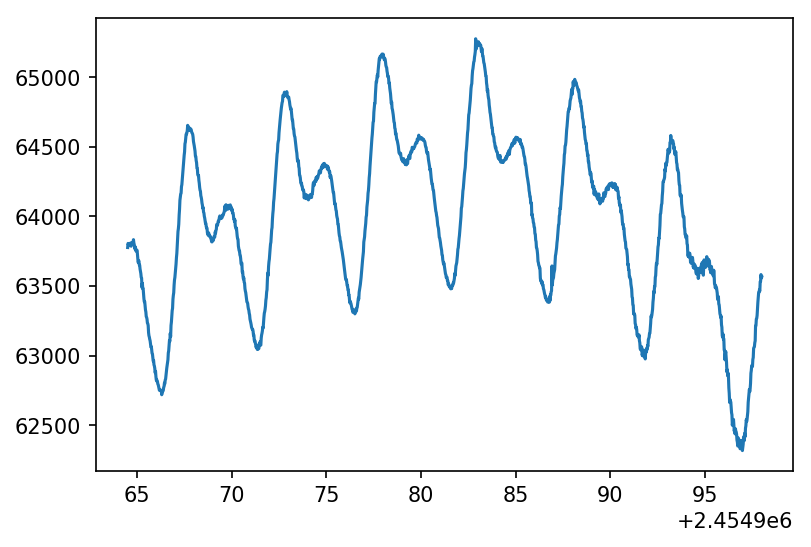

In [46]:
plt.plot(tpf.time, results[:, 0])

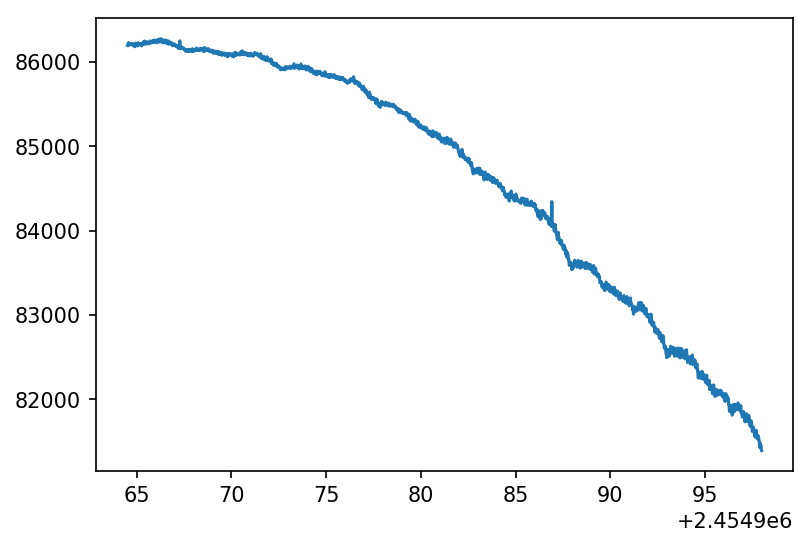

In [54]:
plt.plot(tpf.time, results[:, 1])